# General Preprocessing

## Preprocessing few continuous variables

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_back_up = pd.read_csv("loan_data_2007_2014.csv")

C:\Users\lin48\AppData\Local\Temp\ipykernel_16128\191817296.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_back_up = pd.read_csv("loan_data_2007_2014.csv")


In [3]:
loan_data = loan_data_back_up.copy()

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## preprocess  emp_length,earliest_cr_line,term,issue_d

In [5]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [6]:
loan_data['emp_length_int'] = loan_data["emp_length"].str.replace("+ years","")

In [7]:
loan_data['emp_length_int'].unique()

array(['10', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
loan_data['emp_length_int'] = loan_data["emp_length_int"].str.replace("< 1 year",str(0))

In [9]:
loan_data['emp_length_int'] = loan_data["emp_length_int"].str.replace(" years","")

In [10]:
loan_data['emp_length_int'] = loan_data["emp_length_int"].str.replace(" year","")

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna(str(0))

In [12]:
type(loan_data['emp_length_int'][0])

str

In [13]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [14]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [15]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],format = "%b-%y")

In [16]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
loan_data['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [18]:
loan_data['days_since_earliest_cr_line'] = pd.to_datetime("2017-12-01") - loan_data['earliest_cr_line_date']

In [19]:
loan_data['days_since_earliest_cr_line']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: days_since_earliest_cr_line, Length: 466285, dtype: timedelta64[ns]

In [20]:
loan_data['mths_since_earliest_cr_line'] = round(loan_data['days_since_earliest_cr_line']/np.timedelta64(1, 'M'))

In [21]:
loan_data['mths_since_earliest_cr_line']

0         388.0
1         220.0
2         189.0
3         257.0
4         258.0
          ...  
466280    173.0
466281    242.0
466282    189.0
466283    175.0
466284    210.0
Name: mths_since_earliest_cr_line, Length: 466285, dtype: float64

In [22]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        235.142031
std          92.270010
min        -601.000000
25%         180.000000
50%         221.000000
75%         280.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
loan_data.loc[ : ,["earliest_cr_line","earliest_cr_line_date","mths_since_earliest_cr_line"]][loan_data["mths_since_earliest_cr_line"]<0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -527.0
1770             Sep-68            2068-09-01                       -598.0
2799             Sep-64            2064-09-01                       -551.0
3282             Sep-67            2067-09-01                       -586.0
3359             Feb-65            2065-02-01                       -556.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -590.0
464260           Jul-66            2066-07-01                       -572.0
465100           Oct-67            2067-10-01                       -587.0
465500           Sep-67            2067-09-01                       -586.0
465655           Jan-56            2056-01-01                       -449.0

[1169 rows x 3 columns]

In [24]:
loan_data["mths_since_earliest_cr_line"][loan_data["mths_since_earliest_cr_line"]<0] = loan_data["mths_since_earliest_cr_line"].max()

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\1172901311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["mths_since_earliest_cr_line"][loan_data["mths_since_earliest_cr_line"]<0] = loan_data["mths_since_earliest_cr_line"].max()


In [25]:
loan_data["mths_since_earliest_cr_line"].describe()

count    466256.000000
mean        237.991325
std          84.889238
min          72.000000
25%         181.000000
50%         222.000000
75%         280.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [26]:
loan_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [27]:
loan_data["term_int"] = loan_data["term"].str.replace(" months","")

In [28]:
loan_data["term_int"].unique()

array([' 36', ' 60'], dtype=object)

In [29]:
loan_data["term_int"] = pd.to_numeric(loan_data["term_int"])

In [30]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [31]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'],format = "%b-%y")

In [32]:
loan_data['issue_d_date'].describe()

count                           466285
mean     2013-08-23 15:33:29.494623232
min                2007-06-01 00:00:00
25%                2013-03-01 00:00:00
50%                2014-01-01 00:00:00
75%                2014-07-01 00:00:00
max                2014-12-01 00:00:00
Name: issue_d_date, dtype: object

In [33]:
loan_data['days_since_issue_d'] = pd.to_datetime("2017-12-01") - loan_data['issue_d_date']

In [34]:
loan_data['days_since_issue_d']

0        2192 days
1        2192 days
2        2192 days
3        2192 days
4        2192 days
            ...   
466280   1430 days
466281   1430 days
466282   1430 days
466283   1430 days
466284   1430 days
Name: days_since_issue_d, Length: 466285, dtype: timedelta64[ns]

In [35]:
loan_data["mths_since_issue_d"] = loan_data['days_since_issue_d']/np.timedelta64(1, 'M')

In [36]:
loan_data["mths_since_issue_d"]

0         70.709677
1         70.709677
2         70.709677
3         70.709677
4         70.709677
            ...    
466280    46.129032
466281    46.129032
466282    46.129032
466283    46.129032
466284    46.129032
Name: mths_since_issue_d, Length: 466285, dtype: float64

In [37]:
loan_data["mths_since_issue_d"] = round(loan_data["mths_since_issue_d"])

In [38]:
loan_data["mths_since_issue_d"]

0         71.0
1         71.0
2         71.0
3         71.0
4         71.0
          ... 
466280    46.0
466281    46.0
466282    46.0
466283    46.0
466284    46.0
Name: mths_since_issue_d, Length: 466285, dtype: float64

In [39]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         50.204806
std          14.190212
min          35.000000
25%          40.000000
50%          46.000000
75%          56.000000
max         124.000000
Name: mths_since_issue_d, dtype: float64

## get dummy variables for discrete variables

In [40]:
loan_data["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [41]:
pd.get_dummies(loan_data["grade"],prefix = "grade",prefix_sep = ":",dtype = float)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0           0.0      1.0      0.0      0.0      0.0      0.0      0.0
1           0.0      0.0      1.0      0.0      0.0      0.0      0.0
2           0.0      0.0      1.0      0.0      0.0      0.0      0.0
3           0.0      0.0      1.0      0.0      0.0      0.0      0.0
4           0.0      1.0      0.0      0.0      0.0      0.0      0.0
...         ...      ...      ...      ...      ...      ...      ...
466280      0.0      0.0      1.0      0.0      0.0      0.0      0.0
466281      0.0      0.0      0.0      1.0      0.0      0.0      0.0
466282      0.0      0.0      0.0      1.0      0.0      0.0      0.0
466283      1.0      0.0      0.0      0.0      0.0      0.0      0.0
466284      0.0      0.0      0.0      1.0      0.0      0.0      0.0

[466285 rows x 7 columns]

In [42]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [43]:
type(loan_data_dummies)

list

In [44]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [45]:
loan_data_dummies

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0         False     True    False    False    False    False    False   
1         False    False     True    False    False    False    False   
2         False    False     True    False    False    False    False   
3         False    False     True    False    False    False    False   
4         False     True    False    False    False    False    False   
...         ...      ...      ...      ...      ...      ...      ...   
466280    False    False     True    False    False    False    False   
466281    False    False    False     True    False    False    False   
466282    False    False    False     True    False    False    False   
466283     True    False    False    False    False    False    False   
466284    False    False    False     True    False    False    False   

        sub_grade:A1  sub_grade:A2  sub_grade:A3  ...  addr_state:TX  \
0              False         False         False  ...          False   
1              False         False         False  ...          False   
2              False         False         False  ...          False   
3              False         False         False  ...          False   
4              False         False         False  ...          False   
...              ...           ...           ...  ...            ...   
466280         False         False         False  ...           True   
466281         False         False         False  ...          False   
466282         False         False         False  ...          False   
466283         False         False         False  ...          False   
466284         False         False         False  ...          False   

        addr_state:UT  addr_state:VA  addr_state:VT  addr_state:WA  \
0               False          False          False          False   
1               False          False          False          False   
2               False          False          False          False   
3               False          False          False          False   
4               False          False          False          False   
...               ...            ...            ...            ...   
466280          False          False          False          False   
466281          False          False          False          False   
466282          False          False          False          False   
466283          False          False          False          False   
466284          False          False          False          False   

        addr_state:WI  addr_state:WV  addr_state:WY  initial_list_status:f  \
0               False          False          False                   True   
1               False          False          False                   True   
2               False          False          False                   True   
3               False          False          False                   True   
4               False          False          False                   True   
...               ...            ...            ...                    ...   
466280          False          False          False                  False   
466281          False          False          False                   True   
466282          False          False          False                   True   
466283          False          False          False                  False   
466284          False          False          False                   True   

        initial_list_status:w  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
...                       ...  
466280                   True  
466281                  False  
466282                  False  
466283                   True  
466284                  False  

[466285 rows x 126 columns]

In [46]:
loan_data = pd.concat([loan_data,loan_data_dummies], axis = 1)

In [47]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

## Check for missing values and clean

In [48]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [49]:
loan_data["total_rev_hi_lim"].fillna(loan_data["funded_amnt"], inplace = True)

In [50]:
loan_data["total_rev_hi_lim"].isnull().sum()

0

In [52]:
loan_data["annual_inc"].fillna(loan_data["annual_inc"].mean(), inplace = True)

In [53]:
loan_data["annual_inc"].isnull().sum()

0

In [54]:
loan_data['earliest_cr_line'].isnull().sum()

29

In [55]:
pd.options.display.max_columns = None

In [56]:
loan_data[loan_data["acc_now_delinq"].isnull()]

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
42449       42449  79967      79912       5000         5000           3025.0   
42450       42450  79924      79906       7000         7000           3450.0   
42459       42459  71823      70473       4350         4350            825.0   
42472       42472  72197      72194       3900         3900           2025.0   
42480       42480  79893      79878       6700         6700           6700.0   
42483       42483  73003      70651       3200         3200           2000.0   
42494       42494  72819      72816       7200         5075            350.0   
42509       42509  91023      70879       1900         1900            900.0   
42514       42514  85961      85923       1200         1200            500.0   
42515       42515  85818      85802       5000         5000            375.0   
42516       42516  85781      85727       1400         1400            475.0   
42517       42517  85675      85667       1000         1000            625.0   
42518       42518  84670      79576       5000         5000            300.0   
42519       42519  84098      84091       2500         2500            225.0   
42520       42520  83979      83974       3000         3000            250.0   
42521       42521  83489      83471       2600         2600            575.0   
42522       42522  83185      83132       1000         1000            625.0   
42523       42523  76629      76623       1275         1275              0.0   
42524       42524  74014      73890       6450         6450              0.0   
42525       42525  81085      80973      10500        10500            275.0   
42526       42526  77792      77764       3000         3000            125.0   
42527       42527  77757      70626       3000         3000              0.0   
42528       42528  74505      74469       2000         2000            225.0   
42529       42529  74323      74301       6500         6500              0.0   
42530       42530  73582      73096       3500         3500            225.0   
42531       42531  72998      72992       1000         1000              0.0   
42532       42532  72176      70868       2525         2525            225.0   
42533       42533  71623      70735       6500         6500              0.0   
42534       42534  70686      70681       5000         5000              0.0   

             term  int_rate  installment grade sub_grade  \
42449   36 months      7.43       155.38     A        A2   
42450   36 months      7.75       218.55     A        A3   
42459   36 months      8.07       136.45     A        A4   
42472   36 months      9.33       124.62     B        B3   
42480   36 months      7.75       209.18     A        A3   
42483   36 months      9.96       103.20     B        B5   
42494   36 months     10.28       164.42     C        C1   
42509   36 months      9.64        61.00     B        B4   
42514   36 months      9.01        38.17     B        B2   
42515   36 months     11.22       164.23     C        C4   
42516   36 months     10.91        45.78     C        C3   
42517   36 months     14.07        34.21     E        E3   
42518   36 months      7.75       156.11     A        A3   
42519   36 months      7.43        77.69     A        A2   
42520   36 months      7.43        93.23     A        A2   
42521   36 months      8.38        81.94     A        A5   
42522   36 months      7.12        30.94     A        A1   
42523   36 months     12.49        42.65     D        D3   
42524   36 months     11.22       211.85     C        C4   
42525   36 months     11.22       344.87     C        C4   
42526   36 months      9.01        95.42     B        B2   
42527   36 months      9.33        95.86     B        B3   
42528   36 months      9.96        64.50     B        B5   
42529   36 months      9.64       208.66     B        B4   
42530   36 months     10.28       113.39     C        C1   
42531   36 months      9.64        32.11     B

In [57]:
loan_data["mths_since_earliest_cr_line"].fillna(0, inplace = True)
loan_data["days_since_earliest_cr_line"].fillna(0, inplace = True)

In [58]:
loan_data["acc_now_delinq"].fillna(0, inplace = True)

In [59]:
loan_data["total_acc"].isnull().sum()

29

In [60]:
loan_data["total_acc"].unique()

array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,   1.,  nan, 105.,  83.,  84.,  98.,
        88.,  82.,  91.,  99.,  86.,  93.,  92.,  96., 101., 150.,  95.,
        85., 156.,  89., 106.,  97., 119., 124., 100.,  94., 121., 102.,
       117., 116., 118.])

In [61]:
loan_data["total_acc"].fillna(0, inplace = True)

In [62]:
loan_data["pub_rec"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  9.,  8.,  7., 11., 49.,
       10., 54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34.,
       17.])

In [63]:
loan_data["pub_rec"].fillna(0, inplace=True)

In [64]:
loan_data["open_acc"].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., nan, 40., 45., 49., 53., 51., 43.,  0.,
       62., 48., 50., 52., 54., 76., 58., 55., 84., 75., 61.])

In [65]:
loan_data["open_acc"].fillna(0, inplace=True)

In [66]:
loan_data["inq_last_6mths"].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19., nan])

In [67]:
loan_data["inq_last_6mths"].fillna(0,inplace=True)

In [68]:
loan_data["delinq_2yrs"].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., nan, 13.,
       15., 10., 12., 17., 18., 29., 24., 14., 21., 22., 19., 16.])

In [69]:
loan_data["delinq_2yrs"].fillna(0, inplace=True)

In [70]:
loan_data["emp_length_int"].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

# PD model: Data Preparation

## Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [71]:
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [72]:
loan_data["loan_status"].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [73]:
loan_data["loan_status"].count()

466285

In [74]:
loan_data["loan_status"].value_counts()/loan_data["loan_status"].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [75]:
loan_data["loan_status"][loan_data["loan_status"].isin(["Charged Off","Late (31-120 days)","Default","Does not meet the credit policy. Status:Charged Off"])].value_counts()

loan_status
Charged Off                                            42475
Late (31-120 days)                                      6900
Default                                                  832
Does not meet the credit policy. Status:Charged Off      761
Name: count, dtype: int64

In [76]:
loan_data["loan_status"][loan_data["loan_status"].isin(["Charged Off","Late (31-120 days)","Default","Does not meet the credit policy. Status:Charged Off"])].value_counts().sum()

50968

In [77]:
bad_definition = pd.Series(["Charged Off","Late (31-120 days)","Default","Does not meet the credit policy. Status:Charged Off"])

In [78]:
loan_data["loan_status"][loan_data["loan_status"].isin(bad_definition)].value_counts()

loan_status
Charged Off                                            42475
Late (31-120 days)                                      6900
Default                                                  832
Does not meet the credit policy. Status:Charged Off      761
Name: count, dtype: int64

In [79]:
loan_data["loan_status"][loan_data["loan_status"].isin(bad_definition)].value_counts().sum()

50968

In [80]:
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(bad_definition),0,1)

In [81]:
loan_data["good_bad"].describe()

count    466285.000000
mean          0.890693
std           0.312024
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: good_bad, dtype: float64

## Splitting Data

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x = loan_data.drop("good_bad",axis=1)
y = loan_data["good_bad"]

In [84]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_outputs_train,loan_data_outputs_test = train_test_split(x,y)

In [85]:
loan_data_inputs_train.shape

(349713, 209)

In [86]:
loan_data_outputs_train.shape

(349713,)

In [87]:
loan_data_inputs_test.shape

(116572, 209)

In [88]:
loan_data_outputs_test.shape

(116572,)

In [89]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_outputs_train,loan_data_outputs_test = train_test_split(x,y,test_size=0.2,random_state = 42)

## Data Preparation: An Example

In [278]:
#df_inputs_prepr = loan_data_inputs_train
#df_outputs_prepr = loan_data_outputs_train

df_inputs_prepr = loan_data_inputs_test
df_outputs_prepr = loan_data_outputs_test

In [279]:
df_inputs_prepr["grade"].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [280]:
df1 = pd.concat([df_inputs_prepr["grade"],df_outputs_prepr],axis=1)

In [281]:
df1.head()

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

In [282]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [283]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.962338
1     B  0.923085
2     C  0.882905
3     D  0.844314
4     E  0.805178
5     F  0.775472
6     G  0.697605

In [284]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [285]:
df1

grade  good_bad grade  good_bad
0     A     15108     A  0.962338
1     B     27199     B  0.923085
2     C     25048     C  0.882905
3     D     15390     D  0.844314
4     E      7145     E  0.805178
5     F      2699     F  0.775472
6     G       668     G  0.697605

In [286]:
df1 = df1.iloc[:,[0,1,3]]

In [287]:
df1

grade  good_bad  good_bad
0     A     15108  0.962338
1     B     27199  0.923085
2     C     25048  0.882905
3     D     15390  0.844314
4     E      7145  0.805178
5     F      2699  0.775472
6     G       668  0.697605

In [288]:
df1.columns = [df1.columns.values[0],"n_obs","prop_good"]

In [289]:
df1

grade  n_obs  prop_good
0     A  15108   0.962338
1     B  27199   0.923085
2     C  25048   0.882905
3     D  15390   0.844314
4     E   7145   0.805178
5     F   2699   0.775472
6     G    668   0.697605

In [290]:
df1["n_good"] = df1["n_obs"]*df1["prop_good"]

In [291]:
df1["n_bad"] = df1["n_obs"]*(1-df1["prop_good"])

In [292]:
df1["prop_n_good"] = df1["n_good"]/df1["n_good"].sum()

In [293]:
df1["prop_n_bad"] = df1["n_bad"]/df1["n_bad"].sum()

In [294]:
df1["WOE"] = np.log(df1["prop_n_good"]/df1["prop_n_bad"])

In [295]:
df1["IV"] = (df1["prop_n_good"]-df1["prop_n_bad"])*df1["WOE"]
df1["IV"] = df1["IV"].sum()

## Preprocessing Discrete Variables: Automating Calculaions

In [296]:
def woe_discrete(df1,discrete_variable_name,df_good_bad_variable):
    df1 = pd.concat([df1[discrete_variable_name],df_good_bad_variable],axis=1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
                     df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],"n_obs","prop_good"]
    df1["prop_n_obs"] = df1["n_obs"]/df1["n_obs"].sum()
    df1["n_good"] = df1["n_obs"]*df1["prop_good"]
    df1["n_bad"] = df1["n_obs"]*(1-df1["prop_good"])
    df1["prop_n_good"] = df1["n_good"]/df1["n_good"].sum()
    df1["prop_n_bad"] = df1["n_bad"]/df1["n_bad"].sum()
    df1["WOE"] = np.log(df1["prop_n_good"]/df1["prop_n_bad"])
    df1 = df1.sort_values(by = ["WOE"])
    df1 = df1.reset_index(drop=True)
    df1["IV"] = (df1["prop_n_good"]-df1["prop_n_bad"])*df1["WOE"]
    df1["IV"] = df1["IV"].sum()
    
    return df1

In [297]:
df_temp = woe_discrete(df_inputs_prepr,"grade",df_outputs_prepr)

In [298]:
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WOE        IV  
0    0.019823 -1.262323  0.300551  
1    0.059470 -0.858767  0.300551  
2    0.136605 -0.679261  0.300551  
3    0.235132 -0.407554  0.300551  
4    0.287831 -0.078010  0.300551  
5    0.205299  0.386785  0.300551  
6    0.055839  1.142469  0.300551

## Preprocessing Discrete Variables: Visualizing Results

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [300]:
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WOE        IV  
0    0.019823 -1.262323  0.300551  
1    0.059470 -0.858767  0.300551  
2    0.136605 -0.679261  0.300551  
3    0.235132 -0.407554  0.300551  
4    0.287831 -0.078010  0.300551  
5    0.205299  0.386785  0.300551  
6    0.055839  1.142469  0.300551

In [301]:
def plot_by_woe(df_woe,rotation_of_x_axis_labels = 0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = np.array(df_woe["WOE"])
    plt.figure(figsize=(18, 6))
    plt.plot(x,y,marker = "o",linestyle = '--', color = 'k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title("Weight of Evidence by " + df_woe.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)


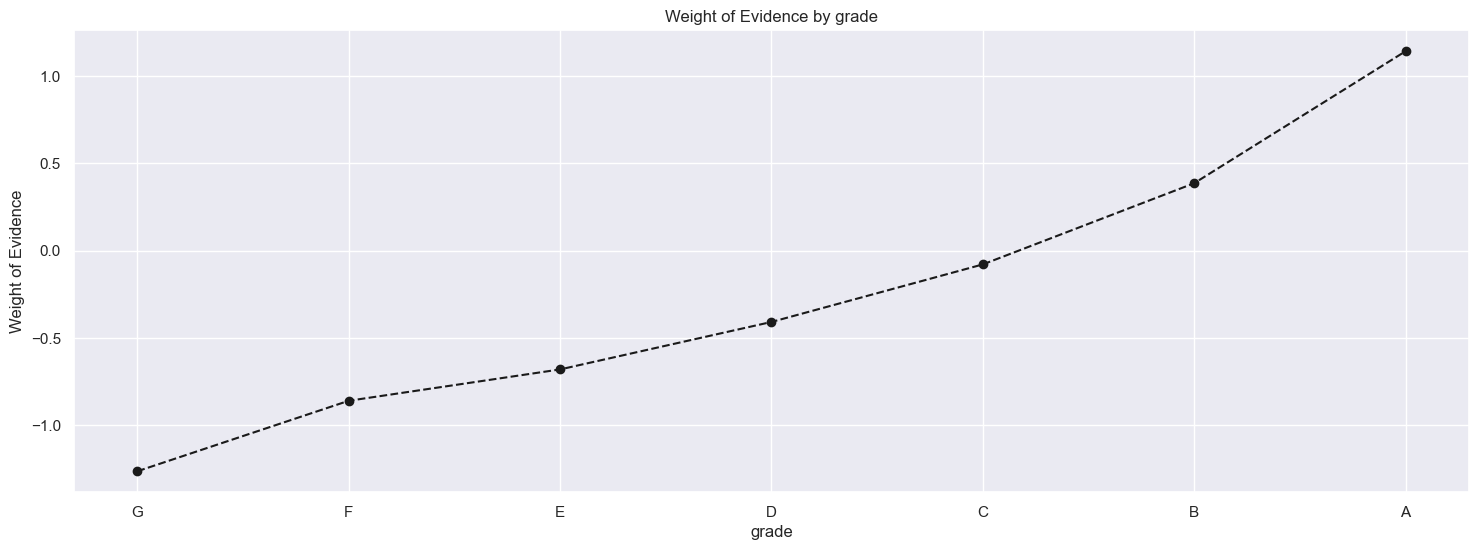

In [302]:
plot_by_woe(df_temp)

## Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [303]:
df_inputs_prepr.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [304]:
df_temp = woe_discrete(df_inputs_prepr,"home_ownership",df_outputs_prepr)

In [305]:
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.777778    0.000483     35.0    10.0     0.000421   
1           NONE     10   0.800000    0.000107      8.0     2.0     0.000096   
2           RENT  37874   0.874003    0.406125  33102.0  4772.0     0.398498   
3            OWN   8409   0.888572    0.090170   7472.0   937.0     0.089951   
4       MORTGAGE  46919   0.904751    0.503115  42450.0  4469.0     0.511033   

   prop_n_bad       WOE        IV  
0    0.000981 -0.845478  0.022938  
1    0.000196 -0.711946  0.022938  
2    0.468302 -0.161412  0.022938  
3    0.091953 -0.022006  0.022938  
4    0.438567  0.152922  0.022938

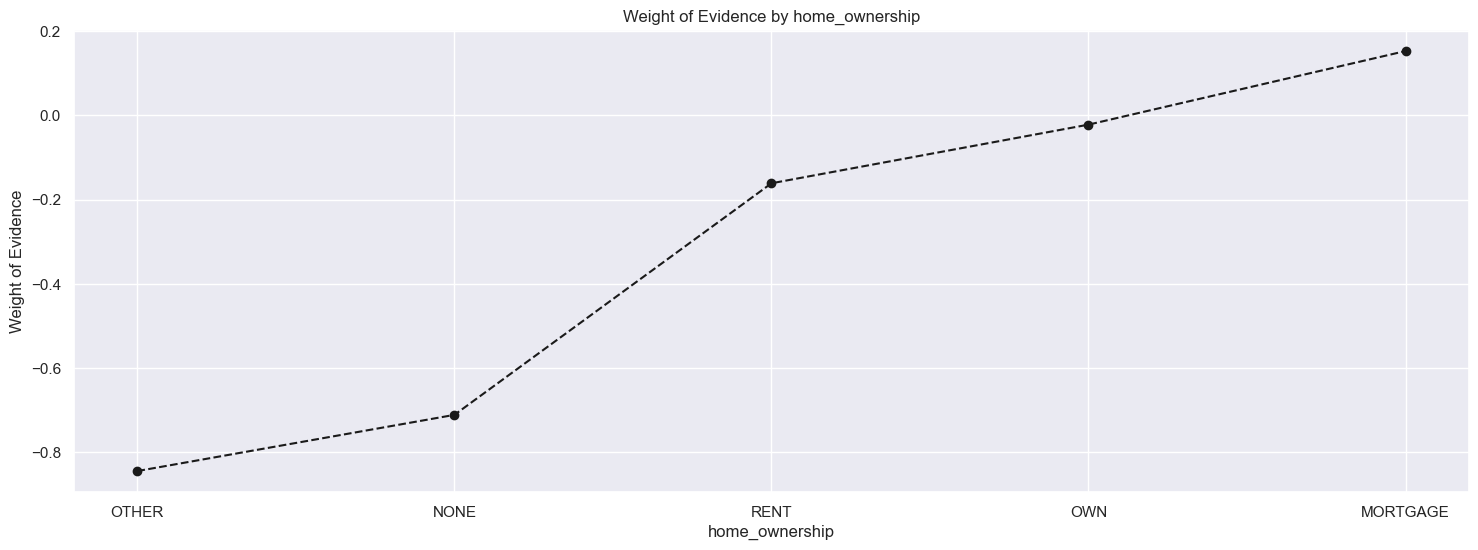

In [306]:
plot_by_woe(df_temp)

In [307]:
df_inputs_prepr["home_ownership:OTHER_NONE_ANY_RENT"] = sum([df_inputs_prepr["home_ownership:OTHER"],df_inputs_prepr["home_ownership:NONE"],df_inputs_prepr["home_ownership:ANY"],df_inputs_prepr["home_ownership:RENT"]])

## Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [308]:
df_temp = woe_discrete(df_inputs_prepr,"addr_state",df_outputs_prepr)

C:\Users\lin48\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [309]:
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000011      0.0     1.0     0.000000   
1          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
2          NV   1298   0.855932    0.013919   1111.0   187.0     0.013375   
3          HI    486   0.860082    0.005211    418.0    68.0     0.005032   
4          FL   6426   0.870059    0.068906   5591.0   835.0     0.067307   
5          AL   1182   0.873096    0.012675   1032.0   150.0     0.012424   
6          NJ   3676   0.875408    0.039418   3218.0   458.0     0.038740   
7          LA   1130   0.876106    0.012117    990.0   140.0     0.011918   
8          NY   8031   0.879965    0.086117   7067.0   964.0     0.085076   
9          RI    403   0.880893    0.004321    355.0    48.0     0.004274   
10         NC   2478   0.881759    0.026572   2185.0   293.0     0.026304   
11         MI   2358   0.882103    0.025285   2080.0   278.0     0.025040   
12         DE    208   0.884615    0.002230    184.0    24.0     0.002215   
13         MD   2203   0.884703    0.023623   1949.0   254.0     0.023463   
14         OK    833   0.885954    0.008932    738.0    95.0     0.008884   
15         MO   1491   0.885983    0.015988   1321.0   170.0     0.015903   
16         AR    728   0.887363    0.007806    646.0    82.0     0.007777   
17         PA   3334   0.888122    0.035751   2961.0   373.0     0.035646   
18         SD    179   0.888268    0.001919    159.0    20.0     0.001914   
19         AZ   2067   0.888728    0.022165   1837.0   230.0     0.022115   
20         NM    513   0.888889    0.005501    456.0    57.0     0.005490   
21         CA  14251   0.889411    0.152814  12675.0  1576.0     0.152588   
22         MA   2214   0.893857    0.023741   1979.0   235.0     0.023824   
23         GA   3015   0.893864    0.032330   2695.0   320.0     0.032444   
24         IN   1315   0.894297    0.014101   1176.0   139.0     0.014157   
25         VA   2856   0.894958    0.030625   2556.0   300.0     0.030770   
26         NH    402   0.895522    0.004311    360.0    42.0     0.004334   
27         OH   3102   0.895551    0.033263   2778.0   324.0     0.033443   
28         UT    672   0.895833    0.007206    602.0    70.0     0.007247   
29         WI   1171   0.896670    0.012557   1050.0   121.0     0.012640   
30         MN   1632   0.897059    0.017500   1464.0   168.0     0.017624   
31         WA   2145   0.899767    0.023001   1930.0   215.0     0.023234   
32         CO   1916   0.906054    0.020545   1736.0   180.0     0.020899   
33         TX   7281   0.906057    0.078075   6597.0   684.0     0.079418   
34         SC   1135   0.906608    0.012171   1029.0   106.0     0.012388   
35         TN   1139   0.906936    0.012214   1033.0   106.0     0.012436   
36         OR   1135   0.907489    0.012171   1030.0   105.0     0.012400   
37         IL   3779   0.908706    0.040522   3434.0   345.0     0.041340   
38         KY    851   0.909518    0.009125    774.0    77.0     0.009318   
39         CT   1429   0.909727    0.015323   1300.0   129.0     0.015650   
40         WV    486   0.917695    0.005211    446.0    40.0     0.005369   
41         WY    209   0.918660    0.002241    192.0    17.0     0.002311   
42         AK    248   0.919355    0.002659    228.0    20.0     0.002745   
43         KS    830   0.920482    0.008900    764.0    66.0     0.009197   
44         VT    178   0.921348    0.001909    164.0    14.0     0.001974   
45         DC    297   0.922559    0.003185    274.0    23.0     0.003299   
46         MS    246   0.922764    0.002638    227.0    19.0     0.002733   
47         MT    293   0.928328    0.003142    272.0    21.0     0.003274   
48         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
49         IA      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WOE   IV  
0     0.000098      -inf  inf  
1     0.000

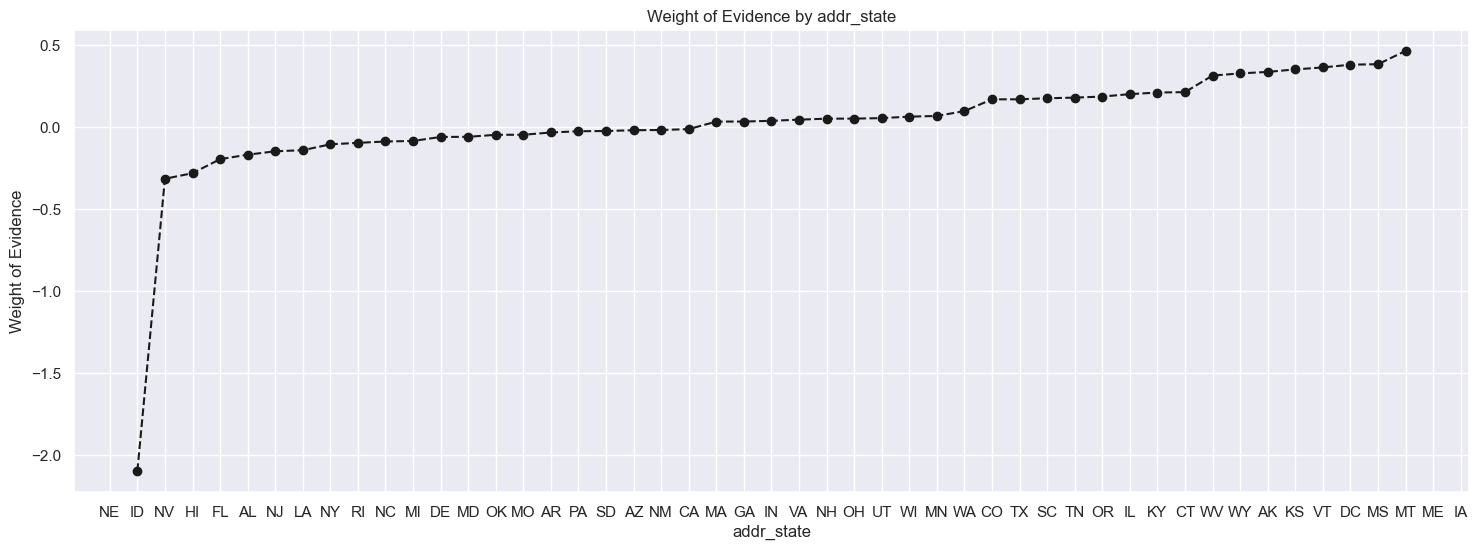

In [310]:
plot_by_woe(df_temp)

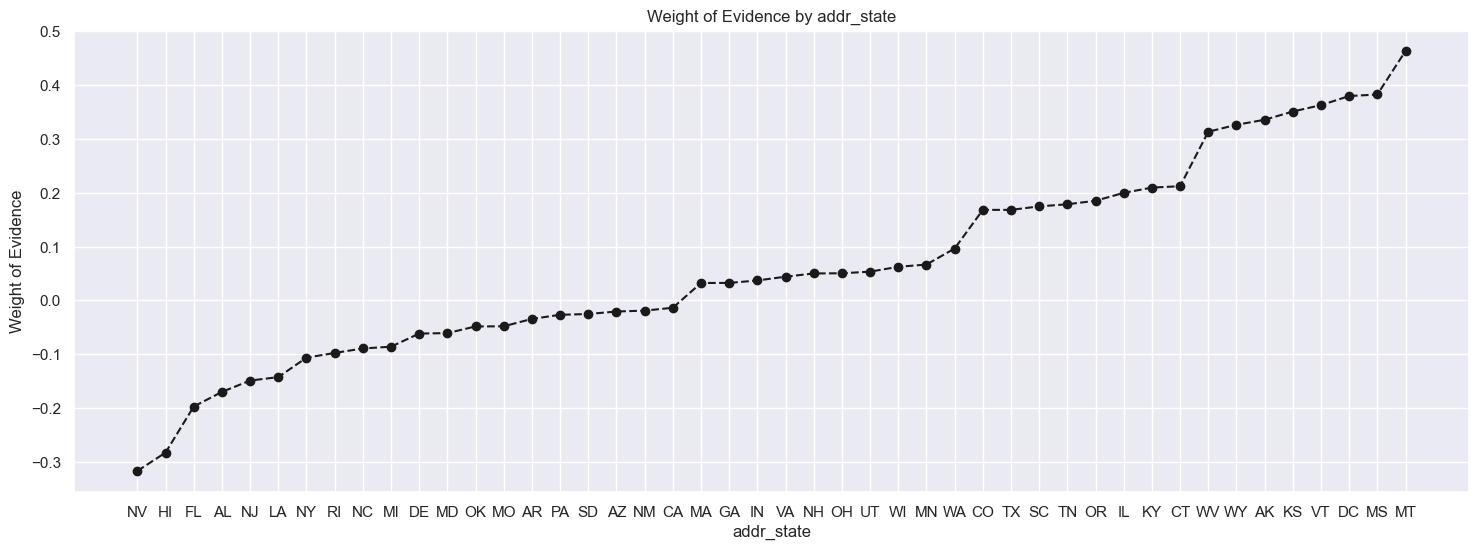

In [311]:
plot_by_woe(df_temp.iloc[2:-2,:])

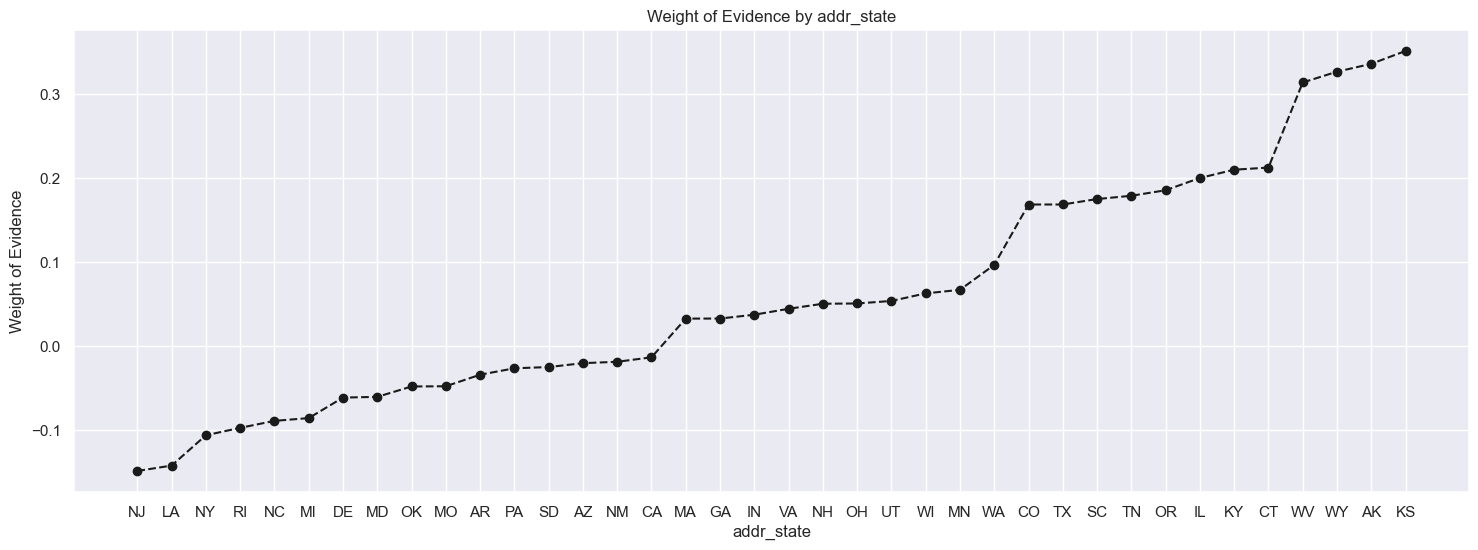

In [312]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [313]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [314]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

## Preprocessing Discrete Variables: Homework

In [315]:
df_temp = woe_discrete(df_inputs_prepr,"verification_status",df_outputs_prepr)

In [316]:
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.872031    0.360734  29336.0  4305.0   
1     Source Verified  29963   0.895738    0.321295  26839.0  3124.0   
2        Not Verified  29653   0.906890    0.317971  26892.0  2761.0   

   prop_n_good  prop_n_bad       WOE        IV  
0     0.353161    0.422473 -0.179202  0.022684  
1     0.323101    0.306575  0.052501  0.022684  
2     0.323739    0.270952  0.177995  0.022684

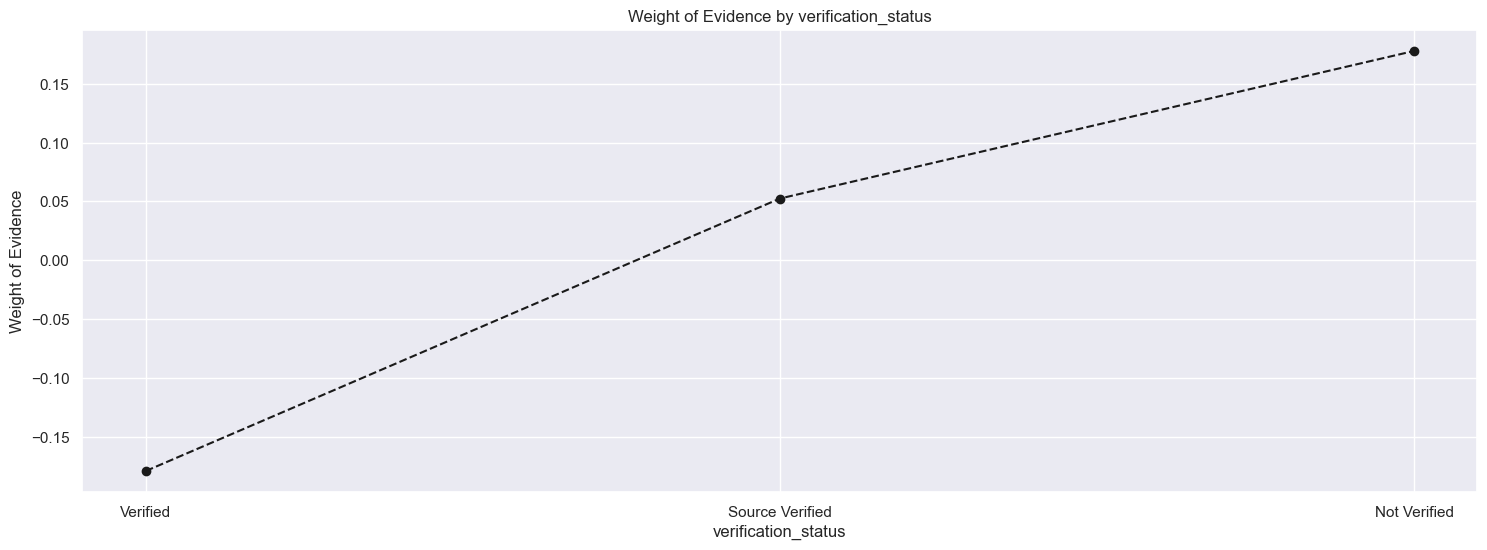

In [317]:
plot_by_woe(df_temp)

In [318]:
df_temp = woe_discrete(df_inputs_prepr,"purpose",df_outputs_prepr)

In [319]:
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational     89   0.752809    0.000954     67.0    22.0   
1     renewable_energy     70   0.771429    0.000751     54.0    16.0   
2       small_business   1431   0.777079    0.015345   1112.0   319.0   
3              medical    918   0.857298    0.009844    787.0   131.0   
4                house    439   0.858770    0.004707    377.0    62.0   
5                other   4806   0.861007    0.051535   4138.0   668.0   
6              wedding    456   0.864035    0.004890    394.0    62.0   
7               moving    602   0.878738    0.006455    529.0    73.0   
8             vacation    496   0.881048    0.005319    437.0    59.0   
9   debt_consolidation  55012   0.885916    0.589897  48736.0  6276.0   
10      major_purchase   1991   0.900552    0.021350   1793.0   198.0   
11    home_improvement   5299   0.906397    0.056821   4803.0   496.0   
12                 car   1072   0.916045    0.011495    982.0    90.0   
13         credit_card  20576   0.916505    0.220638  18858.0  1718.0   

    prop_n_good  prop_n_bad       WOE        IV  
0      0.000807    0.002159 -0.984590  0.045124  
1      0.000650    0.001570 -0.881845  0.045124  
2      0.013387    0.031305 -0.849516  0.045124  
3      0.009474    0.012856 -0.305210  0.045124  
4      0.004539    0.006084 -0.293130  0.045124  
5      0.049815    0.065554 -0.274561  0.045124  
6      0.004743    0.006084 -0.249024  0.045124  
7      0.006368    0.007164 -0.117712  0.045124  
8      0.005261    0.005790 -0.095845  0.045124  
9      0.586707    0.615898 -0.048556  0.045124  
10     0.021585    0.019431  0.105138  0.045124  
11     0.057821    0.048675  0.172179  0.045124  
12     0.011822    0.008832  0.291541  0.045124  
13     0.227022    0.168597  0.297536  0.045124

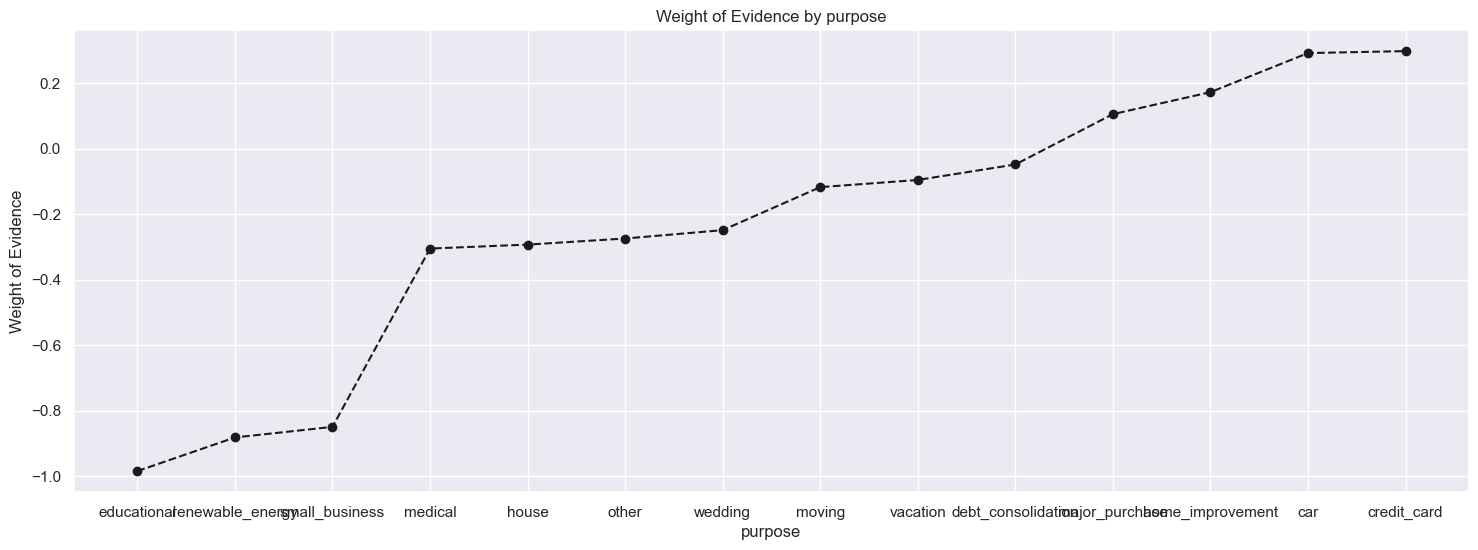

In [320]:
plot_by_woe(df_temp)

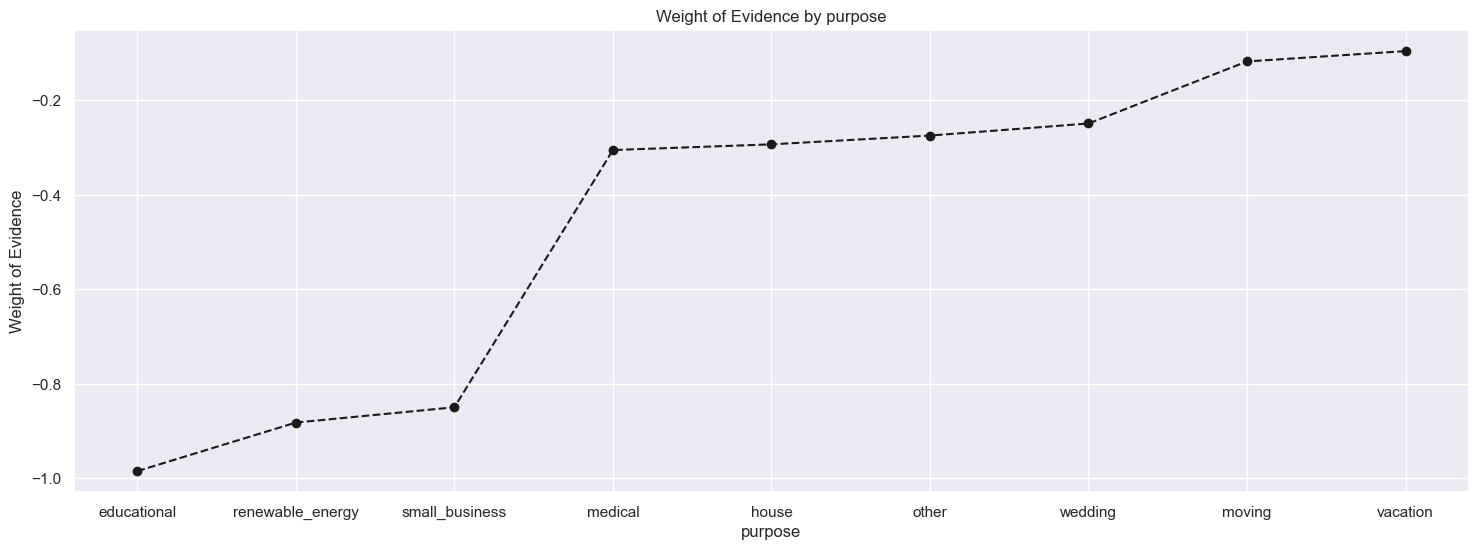

In [321]:
plot_by_woe(df_temp.iloc[:9,:])

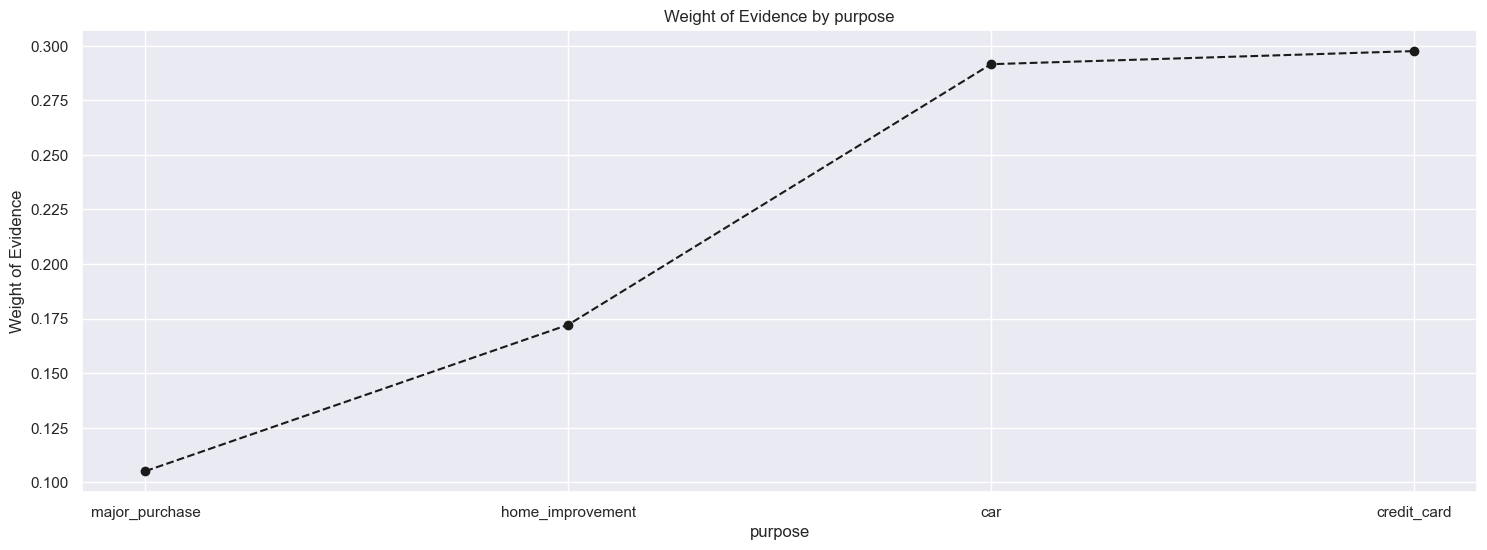

In [322]:
plot_by_woe(df_temp.iloc[-4:,:])

In [323]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [324]:
df_temp = woe_discrete(df_inputs_prepr,"initial_list_status",df_outputs_prepr)

In [325]:
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.879685    0.648648  53213.0  7278.0   
1                   w  32766   0.911127    0.351352  29854.0  2912.0   

   prop_n_good  prop_n_bad       WOE        IV  
0     0.640603     0.71423 -0.108794  0.024888  
1     0.359397     0.28577  0.229238  0.024888

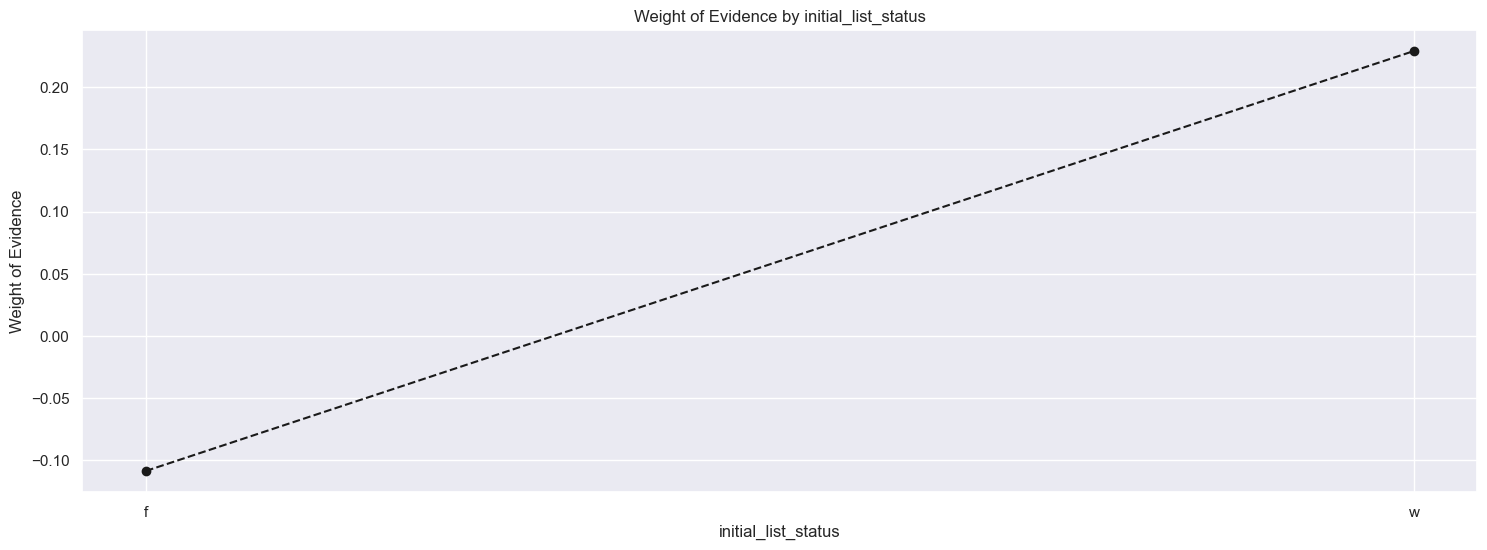

In [326]:
plot_by_woe(df_temp)

## Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [327]:
def woe_ordered_continuous(df1,discrete_variable_name,df_good_bad_variable):
    df1 = pd.concat([df1[discrete_variable_name],df_good_bad_variable],axis=1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
                     df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],"n_obs","prop_good"]
    df1["prop_n_obs"] = df1["n_obs"]/df1["n_obs"].sum()
    df1["n_good"] = df1["n_obs"]*df1["prop_good"]
    df1["n_bad"] = df1["n_obs"]*(1-df1["prop_good"])
    df1["prop_n_good"] = df1["n_good"]/df1["n_good"].sum()
    df1["prop_n_bad"] = df1["n_bad"]/df1["n_bad"].sum()
    df1["WOE"] = np.log(df1["prop_n_good"]/df1["prop_n_bad"])
    #df1 = df1.sort_values(by = ["WOE"])
    #df1 = df1.reset_index(drop=True)
    df1["IV"] = (df1["prop_n_good"]-df1["prop_n_bad"])*df1["WOE"]
    df1["IV"] = df1["IV"].sum()
    
    return df1

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [328]:
df_inputs_prepr["term_int"].unique()

array([60, 36], dtype=int64)

In [329]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"term_int",df_outputs_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534   0.902597    0.724171  60956.0  6578.0     0.733817   
1        60  25723   0.859581    0.275829  22111.0  3612.0     0.266183   

   prop_n_bad       WOE        IV  
0    0.645535  0.128181  0.036603  
1    0.354465 -0.286427  0.036603

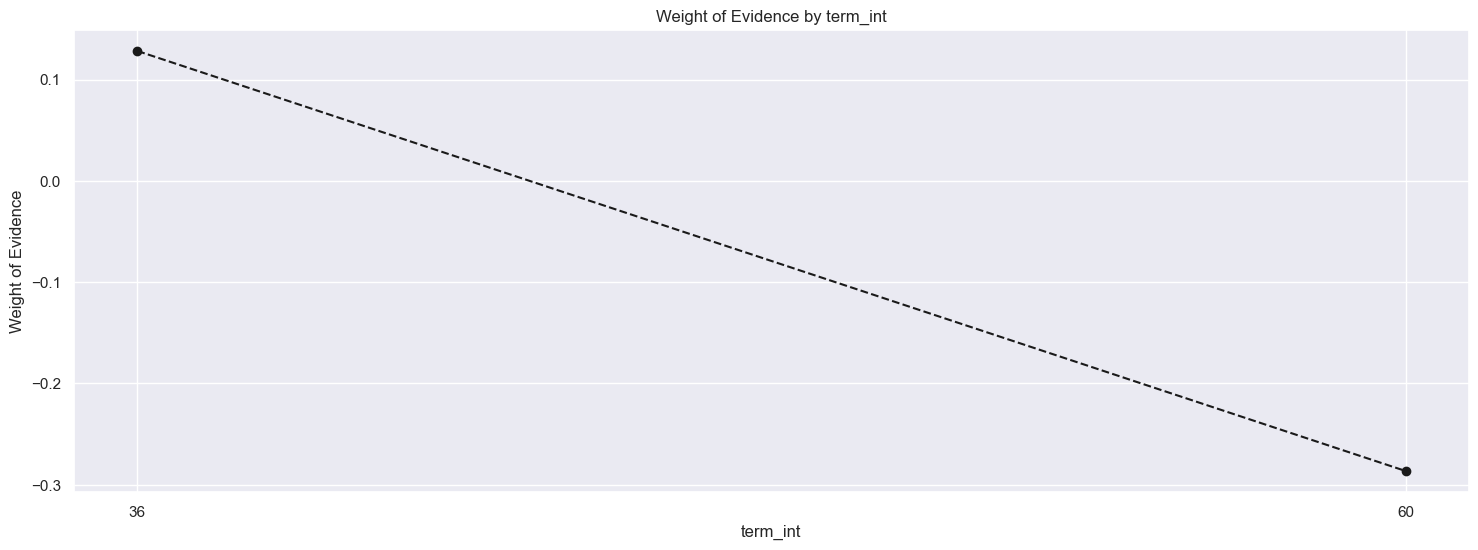

In [330]:
plot_by_woe(df_temp)

In [331]:
df_inputs_prepr["term:36"] = np.where((df_inputs_prepr["term_int"]==36),1,0)

In [332]:
df_inputs_prepr["term:60"] = np.where((df_inputs_prepr["term_int"]==60),1,0)

In [333]:
df_inputs_prepr["emp_length_int"].unique()

array([ 0, 10,  1,  2,  9,  3,  6,  4,  7,  8,  5], dtype=int64)

In [334]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"emp_length_int",df_outputs_prepr)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                0  11553   0.874491    0.123883  10103.0  1450.0   
1                1   5968   0.892594    0.063995   5327.0   641.0   
2                2   8295   0.887402    0.088948   7361.0   934.0   
3                3   7391   0.889325    0.079254   6573.0   818.0   
4                4   5555   0.889469    0.059567   4941.0   614.0   
5                5   6172   0.886261    0.066183   5470.0   702.0   
6                6   5225   0.878852    0.056028   4592.0   633.0   
7                7   5131   0.893588    0.055020   4585.0   546.0   
8                8   4542   0.890137    0.048704   4043.0   499.0   
9                9   3621   0.892847    0.038828   3233.0   388.0   
10              10  29804   0.900517    0.319590  26839.0  2965.0   

    prop_n_good  prop_n_bad       WOE        IV  
0      0.121625    0.142296 -0.156972  0.007766  
1      0.064129    0.062905  0.019273  0.007766  
2      0.088615    0.091658 -0.033766  0.007766  
3      0.079129    0.080275 -0.014377  0.007766  
4      0.059482    0.060255 -0.012913  0.007766  
5      0.065850    0.068891 -0.045140  0.007766  
6      0.055281    0.062120 -0.116640  0.007766  
7      0.055196    0.053582  0.029686  0.007766  
8      0.048672    0.048970 -0.006104  0.007766  
9      0.038920    0.038077  0.021920  0.007766  
10     0.323101    0.290972  0.104738  0.007766

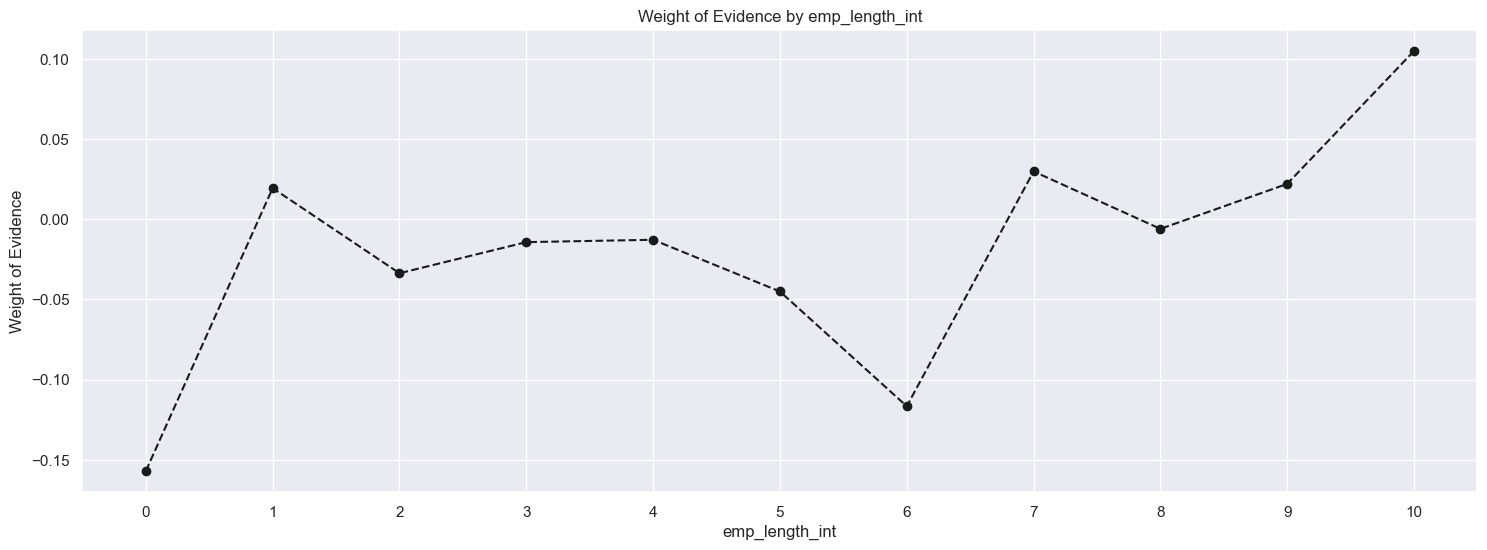

In [335]:
plot_by_woe(df_temp)

In [336]:
df_inputs_prepr["emp_length:0"] = np.where((df_inputs_prepr["emp_length_int"] == 0),1,0)

In [337]:
df_inputs_prepr["emp_length:1"] = np.where((df_inputs_prepr["emp_length_int"] == 1),1,0)

In [338]:
df_inputs_prepr["emp_length:2-4"] = np.where(df_inputs_prepr["emp_length_int"].isin(range(2,5)),1,0)

In [339]:
df_inputs_prepr["emp_length:5-6"] = np.where(df_inputs_prepr["emp_length_int"].isin(range(5,7)),1,0)

In [340]:
df_inputs_prepr["emp_length:7-9"] = np.where(df_inputs_prepr["emp_length_int"].isin(range(7,10)),1,0)

In [341]:
df_inputs_prepr["emp_length:10"] = np.where((df_inputs_prepr["emp_length_int"] == 10),1,0)

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [342]:
df_inputs_prepr["mths_since_issue_d"].unique()

array([ 40.,  37.,  65.,  36.,  57.,  49.,  84.,  50.,  47.,  58.,  71.,
        76.,  46.,  45.,  55.,  54., 117.,  62., 100.,  38.,  52.,  39.,
        51.,  42.,  48.,  56.,  44.,  35.,  53.,  73.,  43.,  72., 101.,
        69.,  93.,  87.,  67.,  80.,  70.,  75., 102.,  64.,  79.,  89.,
        74.,  66.,  41.,  60.,  63.,  59.,  83.,  86., 108.,  94.,  77.,
        81.,  68.,  88.,  61., 106.,  78.,  90., 116.,  97., 113.,  95.,
       112., 114.,  98.,  91., 115., 104., 122.,  99., 123.,  85.,  82.,
        92., 103., 107.,  96., 105., 110., 111., 120., 109., 118., 119.,
       121., 124.])

In [343]:
df_inputs_prepr["mths_since_issue_d_factor"] = pd.cut(df_inputs_prepr["mths_since_issue_d"],50)

In [344]:
df_inputs_prepr["mths_since_issue_d_factor"].unique()

[(38.56, 40.34], (36.78, 38.56], (63.48, 65.26], (34.911, 36.78], (56.36, 58.14], ..., (120.44, 122.22], (122.22, 124.0], (106.2, 107.98], (109.76, 111.54], (118.66, 120.44]]
Length: 50
Categories (50, interval[float64, right]): [(34.911, 36.78] < (36.78, 38.56] < (38.56, 40.34] < (40.34, 42.12] ... (116.88, 118.66] < (118.66, 120.44] < (120.44, 122.22] < (122.22, 124.0]]

In [345]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"mths_since_issue_d_factor",df_outputs_prepr)

In [346]:
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0            (34.911, 36.78]   7191   0.945766    0.077109  6801.0  390.0   
1             (36.78, 38.56]   9752   0.930373    0.104571  9073.0  679.0   
2             (38.56, 40.34]   9506   0.919945    0.101933  8745.0  761.0   
3             (40.34, 42.12]   7240   0.909116    0.077635  6582.0  658.0   
4              (42.12, 43.9]   3821   0.908139    0.040973  3470.0  351.0   
5              (43.9, 45.68]   6500   0.896154    0.069700  5825.0  675.0   
6             (45.68, 47.46]   6197   0.890269    0.066451  5517.0  680.0   
7             (47.46, 49.24]   5821   0.885930    0.062419  5157.0  664.0   
8             (49.24, 51.02]   5021   0.878909    0.053840  4413.0  608.0   
9              (51.02, 52.8]   2350   0.873617    0.025199  2053.0  297.0   
10             (52.8, 54.58]   4211   0.870577    0.045155  3666.0  545.0   
11            (54.58, 56.36]   3572   0.861422    0.038303  3077.0  495.0   
12            (56.36, 58.14]   2904   0.850895    0.031140  2471.0  433.0   
13            (58.14, 59.92]   1197   0.848789    0.012835  1016.0  181.0   
14             (59.92, 61.7]   2588   0.853168    0.027751  2208.0  380.0   
15             (61.7, 63.48]   2343   0.840802    0.025124  1970.0  373.0   
16            (63.48, 65.26]   1721   0.816967    0.018454  1406.0  315.0   
17            (65.26, 67.04]   1296   0.852623    0.013897  1105.0  191.0   
18            (67.04, 68.82]    579   0.848014    0.006209   491.0   88.0   
19             (68.82, 70.6]   1038   0.815029    0.011131   846.0  192.0   
20             (70.6, 72.38]    928   0.831897    0.009951   772.0  156.0   
21            (72.38, 74.16]    790   0.853165    0.008471   674.0  116.0   
22            (74.16, 75.94]    390   0.887179    0.004182   346.0   44.0   
23            (75.94, 77.72]    735   0.863946    0.007881   635.0  100.0   
24             (77.72, 79.5]    624   0.844551    0.006691   527.0   97.0   
25             (79.5, 81.28]    829   0.872135    0.008889   723.0  106.0   
26            (81.28, 83.06]    483   0.859213    0.005179   415.0   68.0   
27            (83.06, 84.84]    228   0.828947    0.002445   189.0   39.0   
28            (84.84, 86.62]    443   0.864560    0.004750   383.0   60.0   
29             (86.62, 88.4]    439   0.863326    0.004707   379.0   60.0   
30             (88.4, 90.18]    397   0.863980    0.004257   343.0   54.0   
31            (90.18, 91.96]    164   0.902439    0.001759   148.0   16.0   
32            (91.96, 93.74]    257   0.879377    0.002756   226.0   31.0   
33            (93.74, 95.52]    276   0.836957    0.002960   231.0   45.0   
34             (95.52, 97.3]    234   0.829060    0.002509   194.0   40.0   
35             (97.3, 99.08]    183   0.868852    0.001962   159.0   24.0   
36           (99.08, 100.86]     87   0.862069    0.000933    75.0   12.0   
37          (100.86, 102.64]    150   0.873333    0.001608   131.0   19.0   
38          (102.64, 104.42]    129   0.868217    0.001383   112.0   17.0   
39           (104.42, 106.2]    119   0.815126    0.001276    97.0   22.0   
40           (106.2, 107.98]     36   0.861111    0.000386    31.0    5.0   
41          (107.98, 109.76]     40   0.800000    0.000429    32.0    8.0   
42          (109.76, 111.54]     37   0.972973    0.000397    36.0    1.0   
43          (111.54, 113.32]     57   0.824561    0.000611    47.0   10.0   
44           (113.32, 115.1]    131   0.801527    0.001405   105.0   26.0   
45           (115.1, 116.88]     59   0.813559    0.000633    48.0   11.0   
46          (116.88, 118.66]     83   0.734940    0.000890    61.0   22.0   
47          (118.66, 120.44]     41   0.609756    0.000440    25.0   16.0   
48          (120.44, 122.22]     23   0.695652    0.000247    16.0    7.0   
49           (122.22, 124.0]     17   0.882353    0.000182    15.0    2.0   

    prop_n_good  prop_n_bad       WOE       IV  
0      0.081874    0.03827

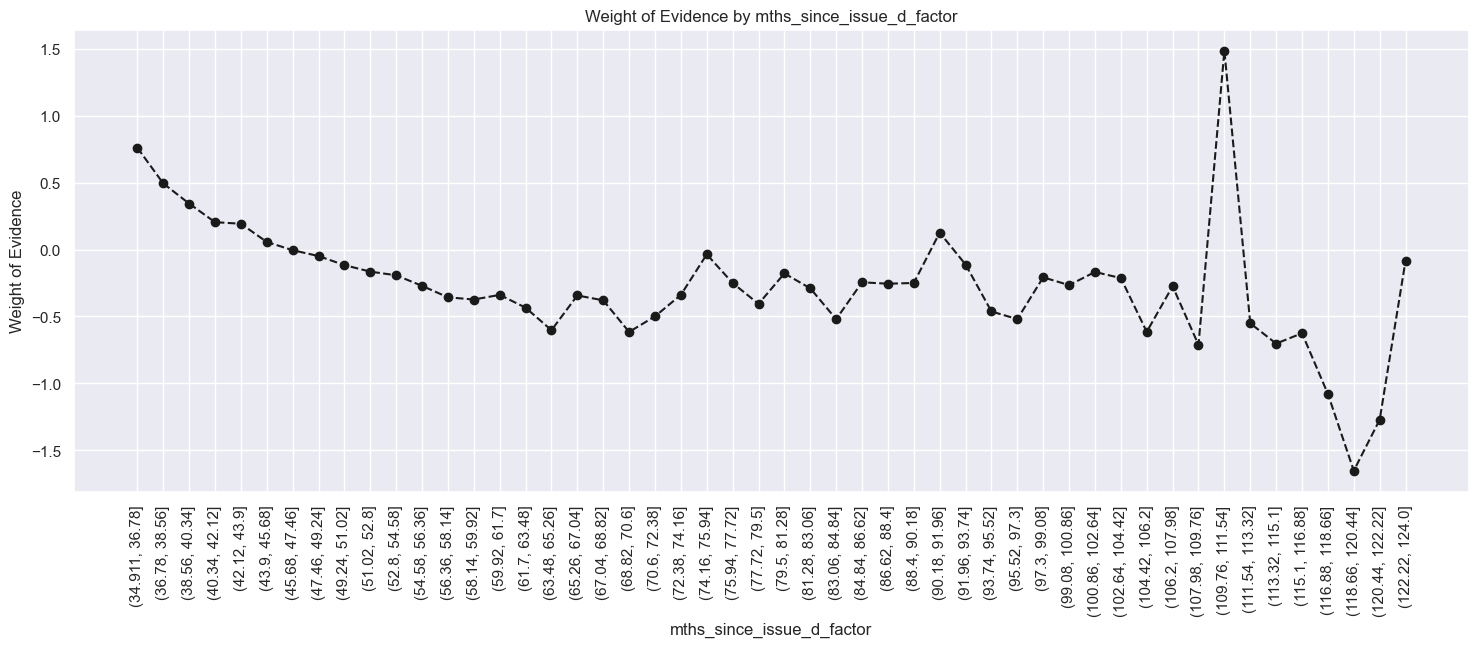

In [347]:
plot_by_woe(df_temp,90)

In [348]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.

df_inputs_prepr["mths_since_issue_d:<38"] = np.where(df_inputs_prepr["mths_since_issue_d"]<38,1,0)

In [349]:
df_inputs_prepr["mths_since_issue_d:38-39"] = np.where(df_inputs_prepr["mths_since_issue_d"].isin(range(38,40)),1,0)

In [350]:
df_inputs_prepr["mths_since_issue_d:40-41"] = np.where(df_inputs_prepr["mths_since_issue_d"].isin(range(40,42)),1,0)

In [351]:
df_inputs_prepr["mths_since_issue_d:42-48"] = np.where(df_inputs_prepr["mths_since_issue_d"].isin(range(42,49)),1,0)

In [352]:
df_inputs_prepr["mths_since_issue_d:49-52"] = np.where(df_inputs_prepr["mths_since_issue_d"].isin(range(49,53)),1,0)

In [353]:
df_inputs_prepr["mths_since_issue_d:53-64"] = np.where(df_inputs_prepr["mths_since_issue_d"].isin(range(53,65)),1,0)

In [354]:
df_inputs_prepr["mths_since_issue_d:65-84"] = np.where(df_inputs_prepr["mths_since_issue_d"].isin(range(65,85)),1,0)

In [355]:
df_inputs_prepr["mths_since_issue_d:>84"] = np.where(df_inputs_prepr["mths_since_issue_d"]>84,1,0)

In [356]:
df_inputs_prepr["int_rate"].count()

93257

In [357]:
df_inputs_prepr["int_rate_factor"] = pd.cut(df_inputs_prepr["int_rate"],50)

In [358]:
df_inputs_prepr["int_rate_factor"].unique()

[(14.914, 15.327], (20.694, 21.106], (14.502, 14.914], (14.089, 14.502], (8.722, 9.135], ..., (7.897, 8.31], (24.822, 25.234], (5.399, 5.833], (25.647, 26.06], (17.804, 18.217]]
Length: 50
Categories (50, interval[float64, right]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [359]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"int_rate_factor",df_outputs_prepr)

In [360]:
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.979866    0.022368  2044.0   42.0   
2     (6.246, 6.658]   1974   0.972138    0.021167  1919.0   55.0   
3     (6.658, 7.071]    477   0.951782    0.005115   454.0   23.0   
4     (7.071, 7.484]    804   0.981343    0.008621   789.0   15.0   
5     (7.484, 7.897]   3245   0.965485    0.034796  3133.0  112.0   
6      (7.897, 8.31]   2429   0.951009    0.026046  2310.0  119.0   
7      (8.31, 8.722]   1680   0.965476    0.018015  1622.0   58.0   
8     (8.722, 9.135]   2384   0.942114    0.025564  2246.0  138.0   
9     (9.135, 9.548]   1590   0.976730    0.017050  1553.0   37.0   
10    (9.548, 9.961]   1881   0.931419    0.020170  1752.0  129.0   
11   (9.961, 10.374]   2766   0.936370    0.029660  2590.0  176.0   
12  (10.374, 10.786]   1390   0.917986    0.014905  1276.0  114.0   
13  (10.786, 11.199]   4464   0.937500    0.047868  4185.0  279.0   
14  (11.199, 11.612]   1213   0.916735    0.013007  1112.0  101.0   
15  (11.612, 12.025]   3737   0.931496    0.040072  3481.0  256.0   
16  (12.025, 12.438]   3077   0.905752    0.032995  2787.0  290.0   
17   (12.438, 12.85]   2754   0.920116    0.029531  2534.0  220.0   
18   (12.85, 13.263]   5440   0.904044    0.058333  4918.0  522.0   
19  (13.263, 13.676]   3806   0.897793    0.040812  3417.0  389.0   
20  (13.676, 14.089]   2692   0.894874    0.028866  2409.0  283.0   
21  (14.089, 14.502]   5760   0.887153    0.061765  5110.0  650.0   
22  (14.502, 14.914]   1187   0.867734    0.012728  1030.0  157.0   
23  (14.914, 15.327]   4811   0.882145    0.051589  4244.0  567.0   
24   (15.327, 15.74]   3146   0.886840    0.033735  2790.0  356.0   
25   (15.74, 16.153]   1869   0.837346    0.020041  1565.0  304.0   
26  (16.153, 16.566]   3230   0.849226    0.034635  2743.0  487.0   
27  (16.566, 16.978]   1035   0.852174    0.011098   882.0  153.0   
28  (16.978, 17.391]   2843   0.848048    0.030486  2411.0  432.0   
29  (17.391, 17.804]   2992   0.837567    0.032083  2506.0  486.0   
30  (17.804, 18.217]    286   0.835664    0.003067   239.0   47.0   
31   (18.217, 18.63]   2729   0.827409    0.029263  2258.0  471.0   
32   (18.63, 19.042]   1835   0.820163    0.019677  1505.0  330.0   
33  (19.042, 19.455]   1135   0.786784    0.012171   893.0  242.0   
34  (19.455, 19.868]   1680   0.816667    0.018015  1372.0  308.0   
35  (19.868, 20.281]   1244   0.849678    0.013339  1057.0  187.0   
36  (20.281, 20.694]    805   0.814907    0.008632   656.0  149.0   
37  (20.694, 21.106]    956   0.791841    0.010251   757.0  199.0   
38  (21.106, 21.519]    701   0.757489    0.007517   531.0  170.0   
39  (21.519, 21.932]    222   0.801802    0.002381   178.0   44.0   
40  (21.932, 22.345]    832   0.775240    0.008922   645.0  187.0   
41  (22.345, 22.758]    586   0.737201    0.006284   432.0  154.0   
42   (22.758, 23.17]    375   0.741333    0.004021   278.0   97.0   
43   (23.17, 23.583]    655   0.778626    0.007024   510.0  145.0   
44  (23.583, 23.996]    408   0.750000    0.004375   306.0  102.0   
45  (23.996, 24.409]    393   0.834606    0.004214   328.0   65.0   
46  (24.409, 24.822]    436   0.786697    0.004675   343.0   93.0   
47  (24.822, 25.234]    351   0.792023    0.003764   278.0   73.0   
48  (25.234, 25.647]    194   0.757732    0.002080   147.0   47.0   
49   (25.647, 26.06]    474   0.738397    0.005083   350.0  124.0   

    prop_n_good  prop_n_bad       WOE        IV  
0      0.002311    0.000589  1.367495  0.371465  
1      0.024607    0.004122  1.786754  0.371465  
2      0.023102    0.005397  1.453986  0.371465  
3      0.005465    0.002257  0.884362  0.371465  
4      0.009498    0.001472  1.864475  0.371465  
5      0.037717    0.010991  1.233007  0.371465  
6      0.027809    0.011678  0.867639  0.371465  
7      0.019526    0.005692  1.232732  0.371465  
8      0.027038    0.013543  0.6914

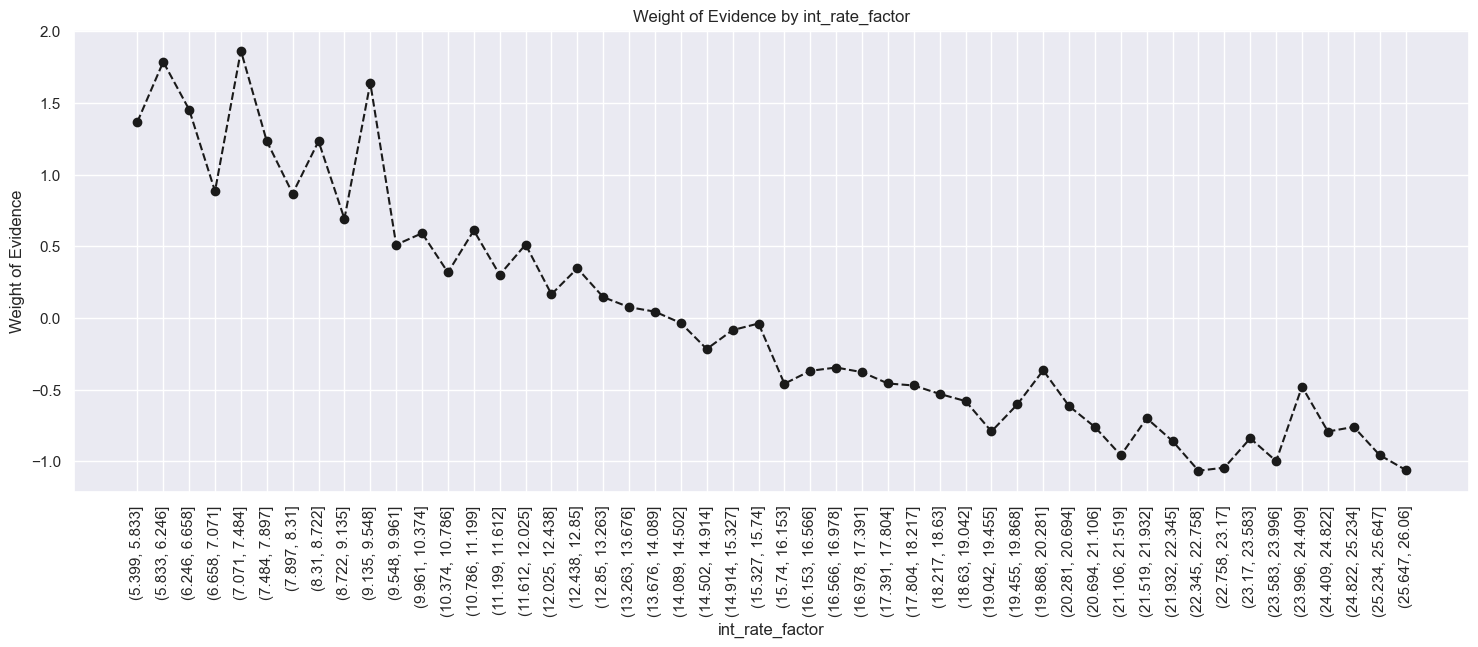

In [361]:
plot_by_woe(df_temp,90)

In [362]:
# # '<= 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr["int_rate:<9.548"] = np.where(df_inputs_prepr["int_rate"]<=9.548,1,0)

In [363]:
df_inputs_prepr["int_rate:9.548-12.025"] = np.where((df_inputs_prepr["int_rate"]>9.548)&(df_inputs_prepr["int_rate"]<=12.025),1,0)

In [364]:
df_inputs_prepr["int_rate:12.025-15.74"] = np.where((df_inputs_prepr["int_rate"]>12.025)&(df_inputs_prepr["int_rate"]<=15.74),1,0)

In [365]:
df_inputs_prepr["int_rate:15.74-20.281"] = np.where((df_inputs_prepr["int_rate"]>15.74)&(df_inputs_prepr["int_rate"]<=20.281),1,0)

In [366]:
df_inputs_prepr["int_rate:>20.281"] = np.where(df_inputs_prepr["int_rate"]>20.281,1,0)

In [367]:
df_inputs_prepr["funded_amnt"].unique()

array([32500, 11000, 30000, ..., 30600, 32850, 29875], dtype=int64)

In [368]:
df_inputs_prepr["funded_amnt_factor"] = pd.cut(df_inputs_prepr["funded_amnt"],50)

In [369]:
df_inputs_prepr["funded_amnt_factor"] .unique()

[(32240.0, 32930.0], (10850.0, 11540.0], (29480.0, 30170.0], (14300.0, 14990.0], (14990.0, 15680.0], ..., (465.5, 1190.0], (31550.0, 32240.0], (26030.0, 26720.0], (28100.0, 28790.0], (30170.0, 30860.0]]
Length: 50
Categories (50, interval[float64, right]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [370]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"funded_amnt_factor",df_outputs_prepr)

In [371]:
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.880878    0.003421   281.0   38.0   
1     (1190.0, 1880.0]    800   0.896250    0.008578   717.0   83.0   
2     (1880.0, 2570.0]   1513   0.900198    0.016224  1362.0  151.0   
3     (2570.0, 3260.0]   1817   0.893781    0.019484  1624.0  193.0   
4     (3260.0, 3950.0]   1245   0.891566    0.013350  1110.0  135.0   
5     (3950.0, 4640.0]   2298   0.882942    0.024642  2029.0  269.0   
6     (4640.0, 5330.0]   3957   0.898155    0.042431  3554.0  403.0   
7     (5330.0, 6020.0]   4186   0.906593    0.044887  3795.0  391.0   
8     (6020.0, 6710.0]   1718   0.881839    0.018422  1515.0  203.0   
9     (6710.0, 7400.0]   2880   0.893403    0.030882  2573.0  307.0   
10    (7400.0, 8090.0]   4266   0.895218    0.045745  3819.0  447.0   
11    (8090.0, 8780.0]   1617   0.890538    0.017339  1440.0  177.0   
12    (8780.0, 9470.0]   2320   0.888793    0.024877  2062.0  258.0   
13   (9470.0, 10160.0]   8552   0.891955    0.091704  7628.0  924.0   
14  (10160.0, 10850.0]   1642   0.872716    0.017607  1433.0  209.0   
15  (10850.0, 11540.0]   2091   0.880918    0.022422  1842.0  249.0   
16  (11540.0, 12230.0]   5767   0.906190    0.061840  5226.0  541.0   
17  (12230.0, 12920.0]   1228   0.875407    0.013168  1075.0  153.0   
18  (12920.0, 13610.0]   1860   0.898925    0.019945  1672.0  188.0   
19  (13610.0, 14300.0]   2087   0.899377    0.022379  1877.0  210.0   
20  (14300.0, 14990.0]   1255   0.886853    0.013457  1113.0  142.0   
21  (14990.0, 15680.0]   5441   0.903143    0.058344  4914.0  527.0   
22  (15680.0, 16370.0]   2920   0.882534    0.031311  2577.0  343.0   
23  (16370.0, 17060.0]   1625   0.880000    0.017425  1430.0  195.0   
24  (17060.0, 17750.0]    921   0.850163    0.009876   783.0  138.0   
25  (17750.0, 18440.0]   2898   0.885783    0.031075  2567.0  331.0   
26  (18440.0, 19130.0]    989   0.858443    0.010605   849.0  140.0   
27  (19130.0, 19820.0]   1057   0.875118    0.011334   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.896736    0.054205  4533.0  522.0   
29  (20510.0, 21200.0]   1635   0.895413    0.017532  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.834034    0.005104   397.0   79.0   
31  (21890.0, 22580.0]   1028   0.883268    0.011023   908.0  120.0   
32  (22580.0, 23270.0]    633   0.892575    0.006788   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022    0.005329   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.898033    0.026711  2237.0  254.0   
35  (24650.0, 25340.0]   2500   0.903200    0.026808  2258.0  242.0   
36  (25340.0, 26030.0]    487   0.852156    0.005222   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742    0.003206   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732    0.004396   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885    0.017200  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843    0.002188   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154    0.003067   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682    0.018894  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068    0.001426   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275    0.002338   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981    0.003935   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892    0.001491   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818    0.002949   248.0   27.0   
48  (33620.0, 34310.0]    142   0.894366    0.001523   127.0   15.0   
49  (34310.0, 35000.0]   3347   0.880789    0.035890  2948.0  399.0   

    prop_n_good  prop_n_bad       WOE        IV  
0      0.003383    0.003729 -0.097472  0.018663  
1      0.008632    0.008145  0.057995  0.018663  
2      0.016396    0.014818  0.101189  0.018663  
3      0.019550    0.018940  0.031717  0.018663  
4      0.013363    0.013248  0.008600  0.018663  
5      0.024426    0.026398 -0.077654  0.018663  
6      0.042785    0.039549  0.0

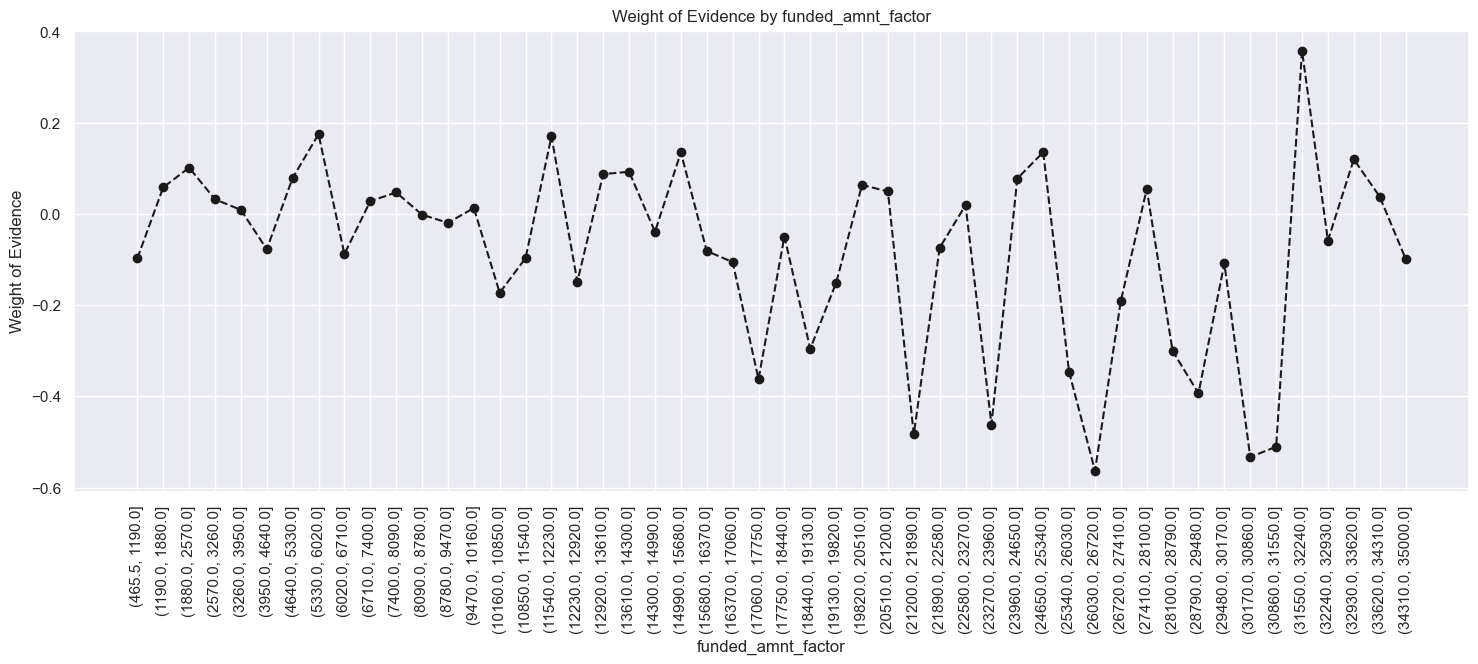

In [372]:
plot_by_woe(df_temp,90)

## Data Preparation: Continuous Variables, Part 1 and 2: Homework

In [373]:
df_inputs_prepr["mths_since_earliest_cr_line"].unique()

array([185., 169., 186., 110., 367., 203., 326., 261., 376., 264., 322.,
       233., 288., 238., 224., 282., 227., 202., 258., 164., 235., 132.,
       433., 191., 125., 281., 189., 509., 167., 144., 147., 247., 198.,
       193., 187., 295., 229., 216., 408., 221., 213., 196., 205., 576.,
       190., 257., 153., 223., 384., 138., 180., 297., 262., 306., 355.,
       212., 430., 245., 268., 179., 217., 184., 557., 241., 201., 341.,
       210., 294., 173., 390., 379., 248., 239., 391., 150., 458., 194.,
       225., 237., 177., 382., 178., 166., 256., 371., 318., 393., 228.,
       477., 121., 344., 539., 137., 240., 250., 124., 215., 172., 113.,
       406., 170., 206., 269., 348., 249., 321., 315., 317., 197., 168.,
       275., 435., 323., 289., 252., 219., 253., 254., 155., 342., 159.,
       165., 307., 293., 314.,  89., 431., 171., 511., 246., 311., 141.,
       200., 242., 399., 117., 298., 274., 372., 226., 157., 299.,  78.,
       192., 300., 327., 325., 251., 111., 337.,  9

In [374]:
df_inputs_prepr["mths_since_earliest_cr_line_factor"] = pd.cut(df_inputs_prepr["mths_since_earliest_cr_line"],50)

In [375]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"mths_since_earliest_cr_line_factor",df_outputs_prepr)

In [376]:
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.576, 11.52]      5   1.000000    0.000054     5.0   
1                      (11.52, 23.04]      0        NaN    0.000000     NaN   
2                      (23.04, 34.56]      0        NaN    0.000000     NaN   
3                      (34.56, 46.08]      0        NaN    0.000000     NaN   
4                       (46.08, 57.6]      0        NaN    0.000000     NaN   
5                       (57.6, 69.12]      0        NaN    0.000000     NaN   
6                      (69.12, 80.64]    182   0.923077    0.001952   168.0   
7                      (80.64, 92.16]    548   0.914234    0.005876   501.0   
8                     (92.16, 103.68]    675   0.847407    0.007238   572.0   
9                     (103.68, 115.2]   1268   0.854890    0.013597  1084.0   
10                    (115.2, 126.72]   2091   0.874701    0.022422  1829.0   
11                   (126.72, 138.24]   3290   0.863830    0.035279  2842.0   
12                   (138.24, 149.76]   3115   0.882183    0.033402  2748.0   
13                   (149.76, 161.28]   3989   0.885686    0.042774  3533.0   
14                    (161.28, 172.8]   4495   0.887208    0.048200  3988.0   
15                    (172.8, 184.32]   5438   0.890953    0.058312  4845.0   
16                   (184.32, 195.84]   6578   0.882183    0.070536  5803.0   
17                   (195.84, 207.36]   7131   0.887393    0.076466  6328.0   
18                   (207.36, 218.88]   6309   0.885402    0.067652  5586.0   
19                    (218.88, 230.4]   5987   0.888091    0.064199  5317.0   
20                    (230.4, 241.92]   4602   0.882660    0.049348  4062.0   
21                   (241.92, 253.44]   4913   0.892123    0.052682  4383.0   
22                   (253.44, 264.96]   4118   0.889752    0.044158  3664.0   
23                   (264.96, 276.48]   4026   0.898162    0.043171  3616.0   
24                    (276.48, 288.0]   3640   0.900275    0.039032  3277.0   
25                    (288.0, 299.52]   2602   0.902767    0.027901  2349.0   
26                   (299.52, 311.04]   2139   0.907901    0.022937  1942.0   
27                   (311.04, 322.56]   1869   0.901017    0.020041  1684.0   
28                   (322.56, 334.08]   2129   0.901362    0.022829  1919.0   
29                    (334.08, 345.6]   1654   0.899637    0.017736  1488.0   
30                    (345.6, 357.12]   1765   0.910482    0.018926  1607.0   
31                   (357.12, 368.64]   1228   0.912866    0.013168  1121.0   
32                   (368.64, 380.16]   1152   0.905382    0.012353  1043.0   
33                   (380.16, 391.68]    966   0.904762    0.010358   874.0   
34                    (391.68, 403.2]    911   0.918771    0.009769   837.0   
35                    (403.2, 414.72]    808   0.925743    0.008664   748.0   
36                   (414.72, 426.24]    524   0.895038    0.005619   469.0   
37                   (426.24, 437.76]    385   0.914286    0.004128   352.0   
38                   (437.76, 449.28]    360   0.922222    0.003860   332.0   
39                    (449.28, 460.8]    376   0.920213    0.004032   346.0   
40                    (460.8, 472.32]    371   0.916442    0.003978   340.0   
41                   (472.32, 483.84]    268   0.906716    0.002874   243.0   
42                   (483.84, 495.36]    255   0.941176    0.002734   240.0   
43                   (495.36, 506.88]    168   0.910714    0.001801   153.0   
44                    (506.88, 518.4]    169   0.928994    0.001812   157.0   
45                    (518.4, 529.92]    135   0.903704    0.001448   122.0   
46                   (529.92, 541.44]    140   0.907143    0.001501   127.0   
47                   (541.44, 552.96]     83   0.927711    0.000890    77.0   
48                   (552.96, 564.48]     80   0.850000    0.000858    68.0   
49                    (564.48, 576.0]    320   0.8687

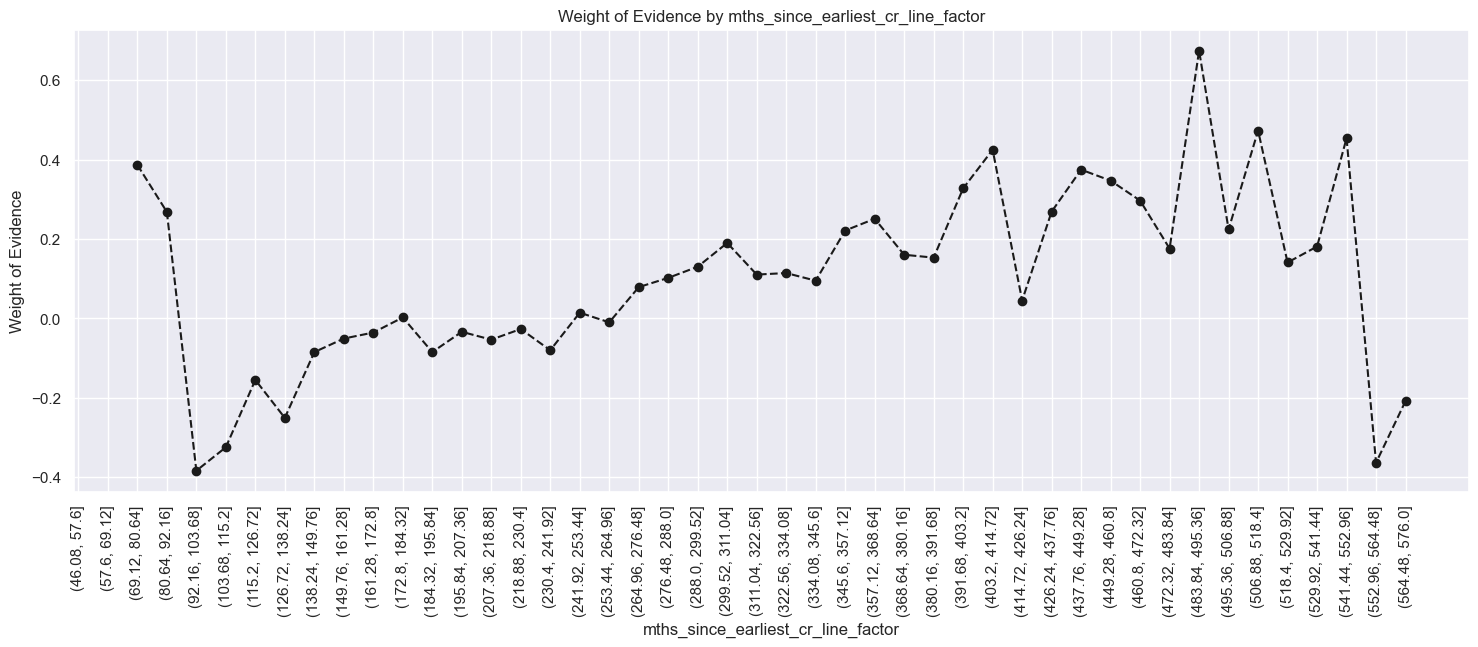

In [377]:
plot_by_woe(df_temp,90)

In [378]:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr["mths_since_earliest_cr_line:<140"] = np.where((df_inputs_prepr["mths_since_earliest_cr_line"]<140),1,0)

In [379]:
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)

In [380]:
df_inputs_prepr["mths_since_earliest_cr_line:>352"] = np.where((df_inputs_prepr["mths_since_earliest_cr_line"]>352),1,0)

In [381]:
df_inputs_prepr["installment"].unique()

array([ 773.01,  297.53, 1034.83, ...,  414.23,  494.33,  121.42])

In [382]:
df_inputs_prepr["installment_factor"] = pd.cut(df_inputs_prepr["installment"],50)

In [383]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"installment_factor",df_outputs_prepr)

In [384]:
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.872165    0.005201   423.0   62.0   
1       (43.585, 71.41]   1246   0.904494    0.013361  1127.0  119.0   
2       (71.41, 99.235]   1731   0.895436    0.018562  1550.0  181.0   
3      (99.235, 127.06]   2292   0.896597    0.024577  2055.0  237.0   
4     (127.06, 154.885]   2602   0.886241    0.027901  2306.0  296.0   
5     (154.885, 182.71]   4133   0.897653    0.044318  3710.0  423.0   
6     (182.71, 210.535]   4109   0.905086    0.044061  3719.0  390.0   
7     (210.535, 238.36]   3730   0.901877    0.039997  3364.0  366.0   
8     (238.36, 266.185]   4660   0.899785    0.049969  4193.0  467.0   
9     (266.185, 294.01]   4975   0.888844    0.053347  4422.0  553.0   
10    (294.01, 321.835]   5186   0.906286    0.055610  4700.0  486.0   
11    (321.835, 349.66]   6432   0.892568    0.068971  5741.0  691.0   
12    (349.66, 377.485]   4758   0.881673    0.051020  4195.0  563.0   
13    (377.485, 405.31]   4352   0.900276    0.046667  3918.0  434.0   
14    (405.31, 433.135]   3429   0.882765    0.036769  3027.0  402.0   
15    (433.135, 460.96]   3225   0.879380    0.034582  2836.0  389.0   
16    (460.96, 488.785]   3865   0.894437    0.041445  3457.0  408.0   
17    (488.785, 516.61]   3861   0.884227    0.041402  3414.0  447.0   
18    (516.61, 544.435]   2730   0.868864    0.029274  2372.0  358.0   
19    (544.435, 572.26]   2564   0.877535    0.027494  2250.0  314.0   
20    (572.26, 600.085]   2434   0.873870    0.026100  2127.0  307.0   
21    (600.085, 627.91]   2294   0.901918    0.024599  2069.0  225.0   
22    (627.91, 655.735]   2091   0.901004    0.022422  1884.0  207.0   
23    (655.735, 683.56]   2295   0.894989    0.024609  2054.0  241.0   
24    (683.56, 711.385]   1650   0.876970    0.017693  1447.0  203.0   
25    (711.385, 739.21]   1252   0.892173    0.013425  1117.0  135.0   
26    (739.21, 767.035]   1360   0.897794    0.014583  1221.0  139.0   
27    (767.035, 794.86]   1160   0.886207    0.012439  1028.0  132.0   
28    (794.86, 822.685]   1023   0.888563    0.010970   909.0  114.0   
29    (822.685, 850.51]    967   0.885212    0.010369   856.0  111.0   
30    (850.51, 878.335]   1046   0.894837    0.011216   936.0  110.0   
31    (878.335, 906.16]    707   0.861386    0.007581   609.0   98.0   
32    (906.16, 933.985]    604   0.855960    0.006477   517.0   87.0   
33    (933.985, 961.81]    635   0.861417    0.006809   547.0   88.0   
34    (961.81, 989.635]    460   0.850000    0.004933   391.0   69.0   
35   (989.635, 1017.46]    441   0.854875    0.004729   377.0   64.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.878641    0.002209   181.0   25.0   
38  (1073.11, 1100.935]    228   0.894737    0.002445   204.0   24.0   
39  (1100.935, 1128.76]    247   0.931174    0.002649   230.0   17.0   
40  (1128.76, 1156.585]    227   0.916300    0.002434   208.0   19.0   
41  (1156.585, 1184.41]    287   0.895470    0.003078   257.0   30.0   
42  (1184.41, 1212.235]    308   0.905844    0.003303   279.0   29.0   
43  (1212.235, 1240.06]    284   0.901408    0.003045   256.0   28.0   
44  (1240.06, 1267.885]    159   0.861635    0.001705   137.0   22.0   
45  (1267.885, 1295.71]    132   0.833333    0.001415   110.0   22.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.714286    0.000225    15.0    6.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WOE   IV  
0      0.005092    0.006084 -0.178003  inf  
1      0.013567    0.011678  0.149950  inf  
2      0.018660    0.017763  0.049273  inf  
3      0.024739    0.023258  0.061730  inf  
4      0.027761    0.029048 -0.045330  inf  
5      0.044663    0.041511  0.073174  inf  
6      0.044771  

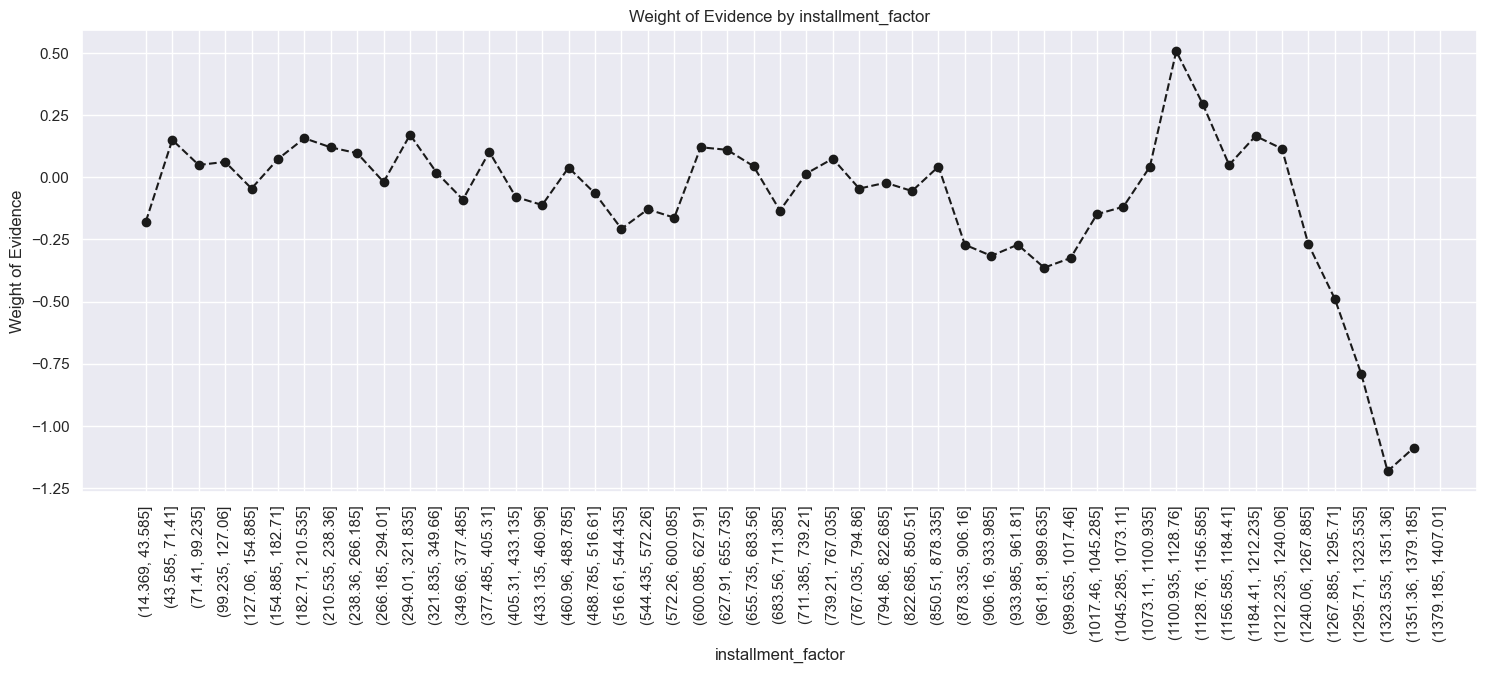

In [385]:
plot_by_woe(df_temp,90)

In [386]:
df_inputs_prepr["delinq_2yrs"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  7., 16.,  8., 18., 10.,  9.,
       13., 11., 14., 12., 19., 15.])

In [387]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"delinq_2yrs",df_outputs_prepr)

In [388]:
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  76566   0.890944    0.821021  68216.0  8350.0     0.821217   
1           1.0  11297   0.890413    0.121138  10059.0  1238.0     0.121095   
2           2.0   3192   0.885025    0.034228   2825.0   367.0     0.034009   
3           3.0   1134   0.893298    0.012160   1013.0   121.0     0.012195   
4           4.0    510   0.886275    0.005469    452.0    58.0     0.005441   
5           5.0    270   0.911111    0.002895    246.0    24.0     0.002961   
6           6.0    128   0.859375    0.001373    110.0    18.0     0.001324   
7           7.0     67   0.925373    0.000718     62.0     5.0     0.000746   
8           8.0     29   0.896552    0.000311     26.0     3.0     0.000313   
9           9.0     22   0.954545    0.000236     21.0     1.0     0.000253   
10         10.0      9   0.888889    0.000097      8.0     1.0     0.000096   
11         11.0     10   1.000000    0.000107     10.0     0.0     0.000120   
12         12.0      8   0.625000    0.000086      5.0     3.0     0.000060   
13         13.0      7   0.857143    0.000075      6.0     1.0     0.000072   
14         14.0      2   1.000000    0.000021      2.0     0.0     0.000024   
15         15.0      1   1.000000    0.000011      1.0     0.0     0.000012   
16         16.0      1   1.000000    0.000011      1.0     0.0     0.000012   
17         18.0      3   1.000000    0.000032      3.0     0.0     0.000036   
18         19.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WOE   IV  
0     0.819431  0.002177  inf  
1     0.121492 -0.003270  inf  
2     0.036016 -0.057339  inf  
3     0.011874  0.026640  inf  
4     0.005692 -0.045001  inf  
5     0.002355  0.229037  inf  
6     0.001766 -0.288132  inf  
7     0.000491  0.419456  inf  
8     0.000294  0.061244  inf  
9     0.000098  0.946282  inf  
10    0.000098 -0.018799  inf  
11    0.000000       inf  inf  
12    0.000294 -1.587415  inf  
13    0.000098 -0.306481  inf  
14    0.000000       inf  inf  
15    0.000000       inf  inf  
16    0.000000       inf  inf  
17    0.000000       inf  inf  
18    0.000000       inf  inf

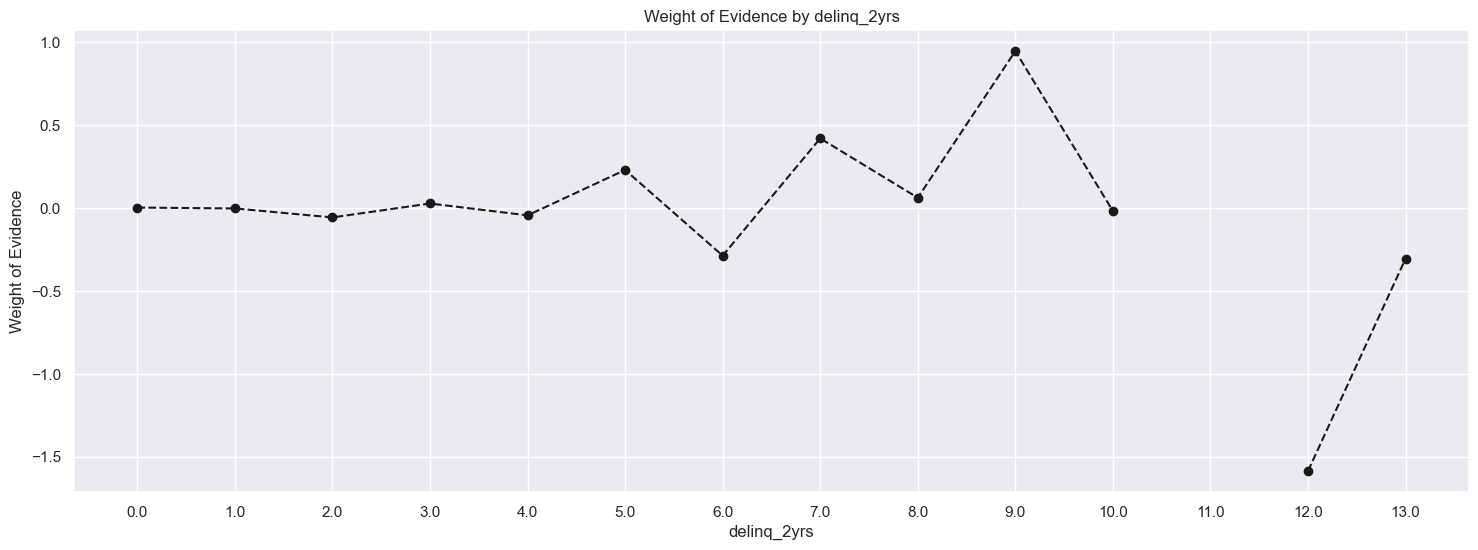

In [389]:
plot_by_woe(df_temp)

In [390]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 4), 1, 0)

In [391]:
df_inputs_prepr["inq_last_6mths"].unique()

array([ 0.,  1.,  2.,  5.,  4.,  6.,  3.,  7.,  8., 11.,  9., 18., 19.,
       24., 10., 12., 13., 14.])

In [392]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"inq_last_6mths",df_outputs_prepr)

C:\Users\lin48\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [393]:
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.910094    0.517870  43953.0  4342.0   
1              1.0  25985   0.882394    0.278639  22929.0  3056.0   
2              2.0  11611   0.861252    0.124505  10000.0  1611.0   
3              3.0   5086   0.846245    0.054537   4304.0   782.0   
4              4.0   1431   0.841370    0.015345   1204.0   227.0   
5              5.0    551   0.842105    0.005908    464.0    87.0   
6              6.0    211   0.763033    0.002263    161.0    50.0   
7              7.0     36   0.527778    0.000386     19.0    17.0   
8              8.0     21   0.523810    0.000225     11.0    10.0   
9              9.0      7   0.428571    0.000075      3.0     4.0   
10            10.0      7   0.857143    0.000075      6.0     1.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   0.000000    0.000011      0.0     1.0   
14            14.0      1   0.000000    0.000011      0.0     1.0   
15            18.0      2   0.500000    0.000021      1.0     1.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WOE   IV  
0      0.529127    0.426104  0.216545  inf  
1      0.276030    0.299902 -0.082945  inf  
2      0.120385    0.158096 -0.272511  inf  
3      0.051814    0.076742 -0.392795  inf  
4      0.014494    0.022277 -0.429786  inf  
5      0.005586    0.008538 -0.424264  inf  
6      0.001938    0.004907 -0.928859  inf  
7      0.000229    0.001668 -1.987015  inf  
8      0.000132    0.000981 -2.002930  inf  
9      0.000036    0.000393 -2.385923  inf  
10     0.000072    0.000098 -0.306481  inf  
11     0.000084    0.000000       inf  inf  
12     0.000036    0.000000       inf  inf  
13     0.000000    0.000098      -inf  inf  
14     0.000000    0.000098      -inf  inf  
15     0.000012    0.000098 -2.098241  inf  
16     0.000012    0.000000       inf  inf  
17     0.000012    0.000000       inf  inf

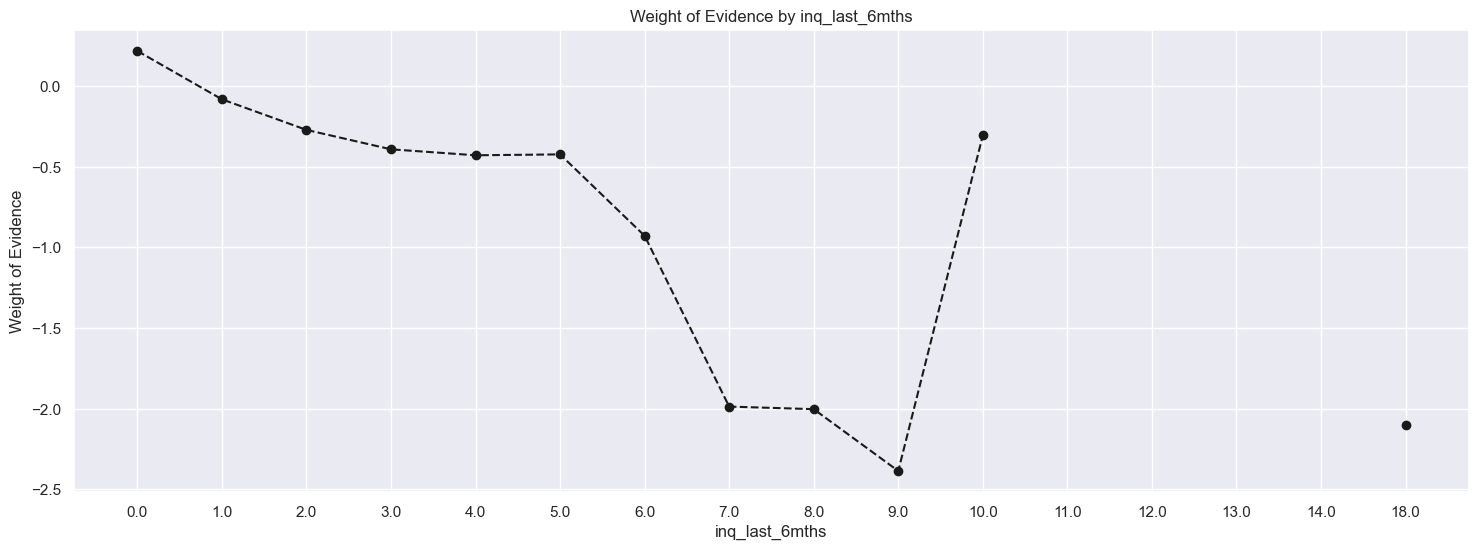

In [394]:
plot_by_woe(df_temp)

In [395]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [396]:
df_inputs_prepr["open_acc"].unique()

array([ 7., 18.,  9., 12.,  5., 22.,  3., 17., 16.,  6., 10., 20., 23.,
       13.,  4., 15., 14., 11., 19., 24., 21.,  8., 31., 26.,  1., 32.,
       37., 27., 25.,  2., 28., 29., 30., 39., 34., 33., 35., 36., 40.,
        0., 38., 53., 48., 52., 46., 42., 45., 43., 58., 41., 49., 61.,
       50.])

In [397]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"open_acc",df_outputs_prepr)

In [398]:
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000084   
1        1.0     32   0.875000    0.000343    28.0    4.0     0.000337   
2        2.0    334   0.838323    0.003582   280.0   54.0     0.003371   
3        3.0   1122   0.852941    0.012031   957.0  165.0     0.011521   
4        4.0   2560   0.892188    0.027451  2284.0  276.0     0.027496   
5        5.0   4403   0.891438    0.047214  3925.0  478.0     0.047251   
6        6.0   6216   0.890766    0.066655  5537.0  679.0     0.066657   
7        7.0   7433   0.886856    0.079704  6592.0  841.0     0.079358   
8        8.0   8314   0.893433    0.089151  7428.0  886.0     0.089422   
9        9.0   8768   0.888230    0.094020  7788.0  980.0     0.093756   
10      10.0   8576   0.889109    0.091961  7625.0  951.0     0.091793   
11      11.0   7740   0.894444    0.082996  6923.0  817.0     0.083342   
12      12.0   6886   0.887017    0.073839  6108.0  778.0     0.073531   
13      13.0   5914   0.893304    0.063416  5283.0  631.0     0.063599   
14      14.0   4960   0.895766    0.053186  4443.0  517.0     0.053487   
15      15.0   4006   0.892162    0.042957  3574.0  432.0     0.043026   
16      16.0   3269   0.898134    0.035054  2936.0  333.0     0.035345   
17      17.0   2680   0.886940    0.028738  2377.0  303.0     0.028615   
18      18.0   2259   0.902169    0.024223  2038.0  221.0     0.024534   
19      19.0   1811   0.893429    0.019419  1618.0  193.0     0.019478   
20      20.0   1444   0.898199    0.015484  1297.0  147.0     0.015614   
21      21.0   1037   0.880424    0.011120   913.0  124.0     0.010991   
22      22.0    784   0.887755    0.008407   696.0   88.0     0.008379   
23      23.0    628   0.904459    0.006734   568.0   60.0     0.006838   
24      24.0    473   0.890063    0.005072   421.0   52.0     0.005068   
25      25.0    391   0.882353    0.004193   345.0   46.0     0.004153   
26      26.0    250   0.884000    0.002681   221.0   29.0     0.002661   
27      27.0    204   0.911765    0.002188   186.0   18.0     0.002239   
28      28.0    153   0.895425    0.001641   137.0   16.0     0.001649   
29      29.0    128   0.843750    0.001373   108.0   20.0     0.001300   
30      30.0    107   0.906542    0.001147    97.0   10.0     0.001168   
31      31.0     73   0.890411    0.000783    65.0    8.0     0.000783   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000710   
33      33.0     47   0.851064    0.000504    40.0    7.0     0.000482   
34      34.0     40   0.825000    0.000429    33.0    7.0     0.000397   
35      35.0     33   0.939394    0.000354    31.0    2.0     0.000373   
36      36.0     22   0.772727    0.000236    17.0    5.0     0.000205   
37      37.0     21   0.857143    0.000225    18.0    3.0     0.000217   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000157   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000132   
40      40.0      9   0.555556    0.000097     5.0    4.0     0.000060   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000072   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000084   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000048   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000048   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

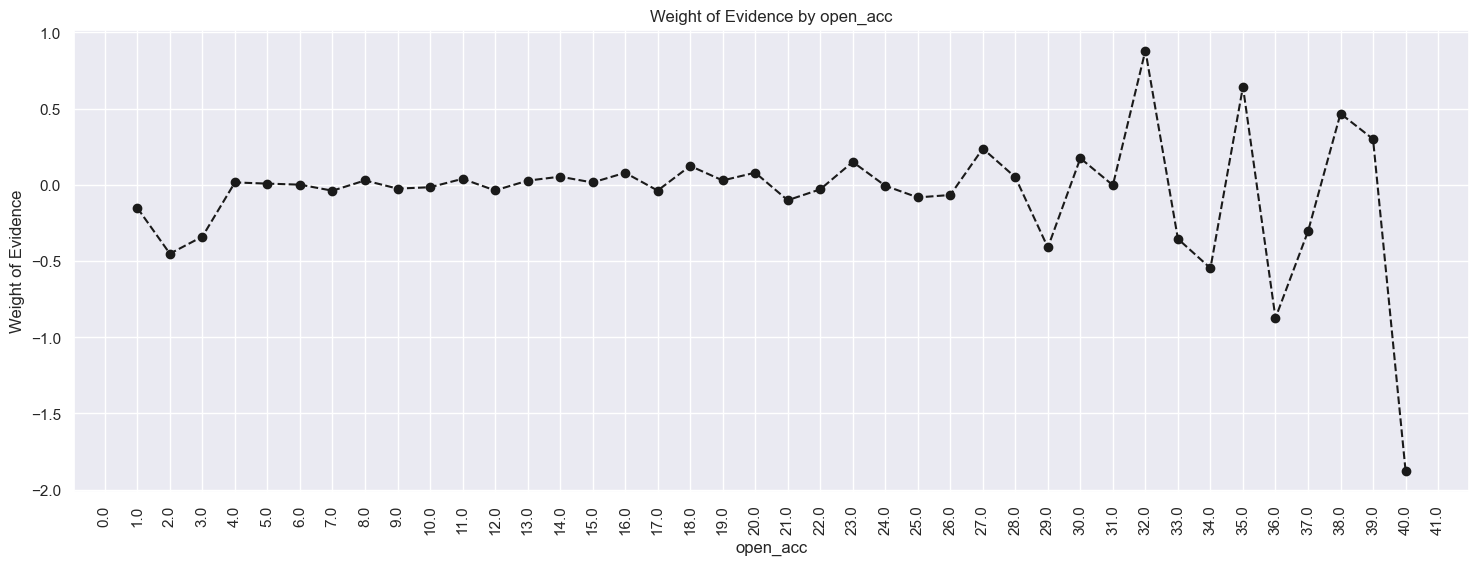

In [399]:
plot_by_woe(df_temp,90)

In [400]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [401]:
df_inputs_prepr["pub_rec"].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5., 12., 49.,  7.,  6.,  8., 14., 11.,
       10.,  9.])

In [402]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"pub_rec",df_outputs_prepr)

In [403]:
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.889179    0.867742  71955.0  8968.0     0.866228   
1       1.0  10670   0.901125    0.114415   9615.0  1055.0     0.115750   
2       2.0   1097   0.904284    0.011763    992.0   105.0     0.011942   
3       3.0    331   0.900302    0.003549    298.0    33.0     0.003587   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001156   
5       5.0     73   0.904110    0.000783     66.0     7.0     0.000795   
6       6.0     19   0.894737    0.000204     17.0     2.0     0.000205   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000132   
8       8.0      5   0.800000    0.000054      4.0     1.0     0.000048   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000060   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WOE   IV  
0     0.880079 -0.015862  inf  
1     0.103533  0.111543  inf  
2     0.010304  0.147522  inf  
3     0.003238  0.102345  inf  
4     0.001570 -0.306481  inf  
5     0.000687  0.145504  inf  
6     0.000196  0.041825  inf  
7     0.000294 -0.798958  inf  
8     0.000098 -0.711946  inf  
9     0.000000       inf  inf  
10    0.000000       inf  inf  
11    0.000000       inf  inf  
12    0.000000       inf  inf  
13    0.000000       inf  inf  
14    0.000000       inf  inf

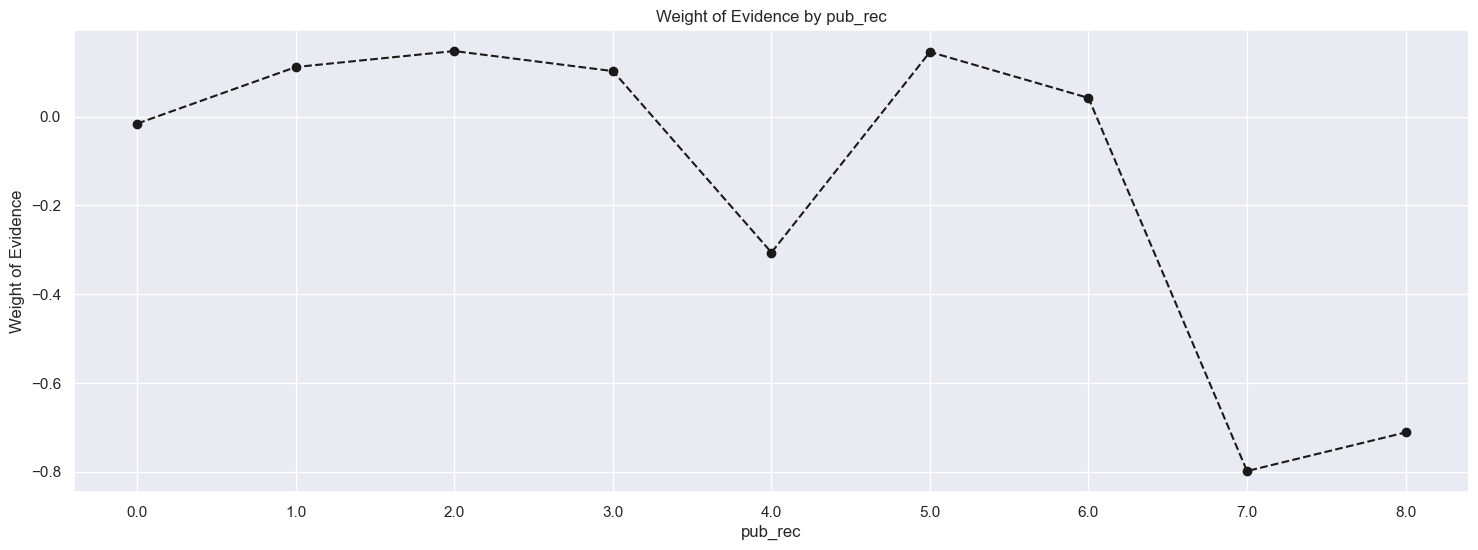

In [404]:
plot_by_woe(df_temp)

In [405]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [406]:
df_inputs_prepr["total_acc"].unique()

array([ 20.,  43.,  38.,  31.,  36.,  48.,  10.,  45.,   5.,  32.,  26.,
        41.,  40.,  47.,   8.,  14.,  42.,  24.,   6.,  23.,  17.,  11.,
        25.,  21.,  28.,  29.,  12.,  37.,  19.,  35.,  34.,  30.,  18.,
        13.,   9.,  44.,  50.,  22.,  33.,  59.,  16.,  15.,  27.,  39.,
        46.,  63.,   7.,  52.,  56.,  54.,  49.,   4.,  57.,  60.,  53.,
        67.,  51.,  55.,  65.,  61., 156.,   3.,  66.,  58.,  80.,  64.,
        62.,  73.,  71.,  72.,  91.,  79.,  69.,   2.,  78.,   0.,  81.,
        92.,  74.,  70.,  77.,  75.,  68.,  76.,  85.,  88.,  94.,  97.,
         1.,  99.,  86.,  89.,  84.,  83.,  82.,  93.])

In [407]:
df_inputs_prepr["total_acc_factor"] = pd.cut(df_inputs_prepr["total_acc"],50)

In [408]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"total_acc_factor",df_outputs_prepr)

In [409]:
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.776000    0.001340     97.0    28.0   
1       (3.12, 6.24]   1499   0.850567    0.016074   1275.0   224.0   
2       (6.24, 9.36]   3715   0.871871    0.039836   3239.0   476.0   
3      (9.36, 12.48]   6288   0.874841    0.067427   5501.0   787.0   
4      (12.48, 15.6]   8289   0.888286    0.088883   7363.0   926.0   
5      (15.6, 18.72]   9843   0.890176    0.105547   8762.0  1081.0   
6     (18.72, 21.84]  10270   0.893866    0.110126   9180.0  1090.0   
7     (21.84, 24.96]   9971   0.892789    0.106920   8902.0  1069.0   
8     (24.96, 28.08]  11873   0.892108    0.127315  10592.0  1281.0   
9      (28.08, 31.2]   7289   0.892715    0.078160   6507.0   782.0   
10     (31.2, 34.32]   6151   0.902617    0.065958   5552.0   599.0   
11    (34.32, 37.44]   4745   0.905796    0.050881   4298.0   447.0   
12    (37.44, 40.56]   3615   0.897372    0.038764   3244.0   371.0   
13    (40.56, 43.68]   2883   0.890045    0.030915   2566.0   317.0   
14     (43.68, 46.8]   1938   0.891641    0.020781   1728.0   210.0   
15     (46.8, 49.92]   1478   0.905954    0.015849   1339.0   139.0   
16    (49.92, 53.04]   1309   0.902215    0.014036   1181.0   128.0   
17    (53.04, 56.16]    640   0.893750    0.006863    572.0    68.0   
18    (56.16, 59.28]    428   0.873832    0.004589    374.0    54.0   
19     (59.28, 62.4]    386   0.878238    0.004139    339.0    47.0   
20     (62.4, 65.52]    322   0.844720    0.003453    272.0    50.0   
21    (65.52, 68.64]     57   0.947368    0.000611     54.0     3.0   
22    (68.64, 71.76]     43   0.906977    0.000461     39.0     4.0   
23    (71.76, 74.88]     24   1.000000    0.000257     24.0     0.0   
24     (74.88, 78.0]     26   0.923077    0.000279     24.0     2.0   
25     (78.0, 81.12]     13   0.769231    0.000139     10.0     3.0   
26    (81.12, 84.24]     11   0.909091    0.000118     10.0     1.0   
27    (84.24, 87.36]      8   0.875000    0.000086      7.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000064      5.0     1.0   
29     (90.48, 93.6]      7   0.857143    0.000075      6.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000011      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000032      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WOE   IV  
0      0.001168    0.002748 -0.855734  inf  
1      0.015349    0.021982 -0.359185  inf  
2      0.038993    0.046712 -0.180639  inf  
3      0.066224    0.077233 -0.153784  inf  
4      0.088639    0.090873 -0.024892  inf  
5      0.105481    0.106084 -0.005703  inf  
6      0.110513    0.106968  0.032609  inf  
7      0.107167    0.1

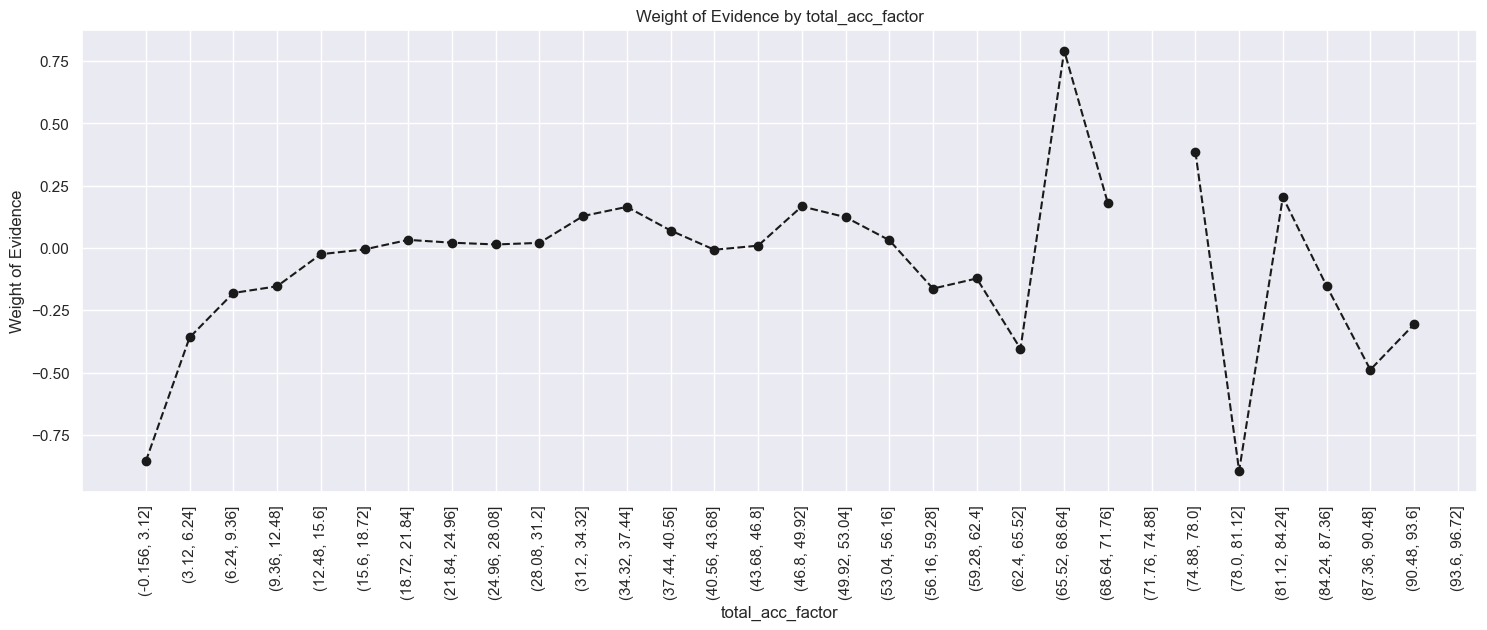

In [410]:
plot_by_woe(df_temp,90)

In [411]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [412]:
df_inputs_prepr["acc_now_delinq"].unique()

array([0., 1., 2., 3.])

In [413]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"acc_now_delinq",df_outputs_prepr)

In [414]:
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0             0.0  92871   0.890827    0.995861  82732.0  10139.0   
1             1.0    360   0.872222    0.003860    314.0     46.0   
2             2.0     22   0.818182    0.000236     18.0      4.0   
3             3.0      4   0.750000    0.000043      3.0      1.0   

   prop_n_good  prop_n_bad       WOE        IV  
0     0.995967    0.994995  0.000976  0.000298  
1     0.003780    0.004514 -0.177489  0.000298  
2     0.000217    0.000393 -0.594163  0.000298  
3     0.000036    0.000098 -0.999628  0.000298

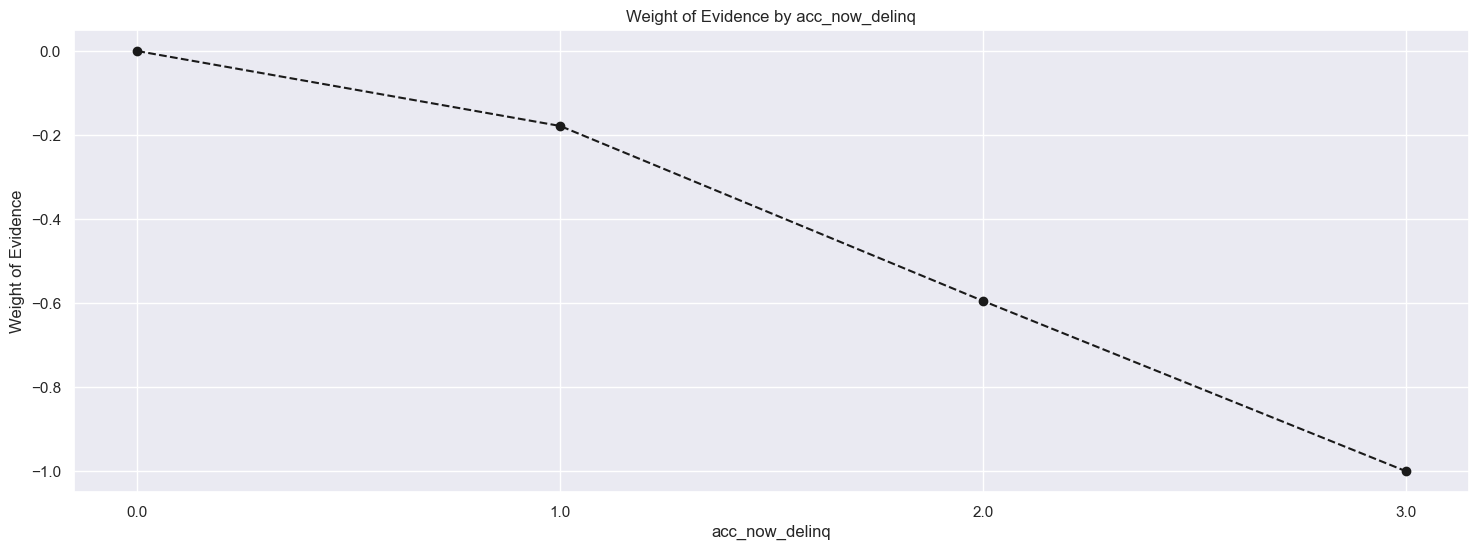

In [415]:
plot_by_woe(df_temp)

In [416]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [417]:
df_inputs_prepr["total_rev_hi_lim"].max()-df_inputs_prepr["total_rev_hi_lim"].min()

2013133.0

In [418]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

In [419]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_outputs_prepr)
df_temp

C:\Users\lin48\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.840336    0.002552   200.0   38.0   
1           (1006.566, 2013.133]    678   0.827434    0.007270   561.0  117.0   
2             (2013.133, 3019.7]   1121   0.852810    0.012021   956.0  165.0   
3             (3019.7, 4026.266]   1461   0.878166    0.015666  1283.0  178.0   
4           (4026.266, 5032.832]   2163   0.867776    0.023194  1877.0  286.0   
5           (5032.832, 6039.399]   2411   0.873911    0.025853  2107.0  304.0   
6           (6039.399, 7045.966]   2376   0.871212    0.025478  2070.0  306.0   
7           (7045.966, 8052.532]   2825   0.875398    0.030293  2473.0  352.0   
8           (8052.532, 9059.098]   2686   0.873045    0.028802  2345.0  341.0   
9          (9059.098, 10065.665]   3514   0.870233    0.037681  3058.0  456.0   
10        (10065.665, 11072.232]   2599   0.882647    0.027869  2294.0  305.0   
11        (11072.232, 12078.798]   3226   0.875387    0.034593  2824.0  402.0   
12        (12078.798, 13085.364]   2673   0.876543    0.028663  2343.0  330.0   
13        (13085.364, 14091.931]   2702   0.884160    0.028974  2389.0  313.0   
14        (14091.931, 15098.498]   3151   0.884481    0.033788  2787.0  364.0   
15        (15098.498, 16105.064]   2999   0.873958    0.032158  2621.0  378.0   
16         (16105.064, 17111.63]   2401   0.890462    0.025746  2138.0  263.0   
17         (17111.63, 18118.197]   2545   0.878978    0.027290  2237.0  308.0   
18        (18118.197, 19124.764]   2282   0.878177    0.024470  2004.0  278.0   
19         (19124.764, 20131.33]   2717   0.878911    0.029135  2388.0  329.0   
20         (20131.33, 21137.896]   2167   0.892940    0.023237  1935.0  232.0   
21        (21137.896, 22144.463]   1999   0.893447    0.021435  1786.0  213.0   
22         (22144.463, 23151.03]   1903   0.893326    0.020406  1700.0  203.0   
23         (23151.03, 24157.596]   1963   0.890474    0.021049  1748.0  215.0   
24        (24157.596, 25164.163]   2075   0.887229    0.022250  1841.0  234.0   
25        (25164.163, 26170.729]   1656   0.899758    0.017757  1490.0  166.0   
26        (26170.729, 27177.296]   1561   0.888533    0.016739  1387.0  174.0   
27        (27177.296, 28183.862]   1617   0.889920    0.017339  1439.0  178.0   
28        (28183.862, 29190.428]   1483   0.903574    0.015902  1340.0  143.0   
29        (29190.428, 30196.995]   1486   0.891655    0.015934  1325.0  161.0   
30        (30196.995, 31203.562]   1428   0.902661    0.015313  1289.0  139.0   
31        (31203.562, 32210.128]   1224   0.907680    0.013125  1111.0  113.0   
32        (32210.128, 33216.694]   1177   0.896347    0.012621  1055.0  122.0   
33        (33216.694, 34223.261]   1147   0.893636    0.012299  1025.0  122.0   
34        (34223.261, 35229.828]   1286   0.891913    0.013790  1147.0  139.0   
35        (35229.828, 36236.394]   1000   0.897000    0.010723   897.0  103.0   
36         (36236.394, 37242.96]    934   0.905782    0.010015   846.0   88.0   
37         (37242.96, 38249.527]    902   0.879157    0.009672   793.0  109.0   
38        (38249.527, 39256.094]    891   0.900112    0.009554   802.0   89.0   
39         (39256.094, 40262.66]    828   0.903382    0.008879   748.0   80.0   
40         (40262.66, 41269.227]    797   0.908407    0.008546   724.0   73.0   
41        (41269.227, 42275.793]    729   0.914952    0.007817   667.0   62.0   
42         (42275.793, 43282.36]    716   0.895251    0.007678   641.0   75.0   
43         (43282.36, 44288.926]    755   0.911258    0.008096   688.0   67.0   
44        (44288.926, 45295.492]    647   0.919629    0.006938   595.0   52.0   
45        (45295.492, 46302.059]    660   0.921212    0.007077   608.0   52.0   
46        (46302.059, 47308.626]    550   0.932727    0.005898   513.0   37.0   
47        (47308.626, 48315.192]    592   0.930743    0.006348   551.0   41.0   
48        (48315.192, 49321.758]    522 

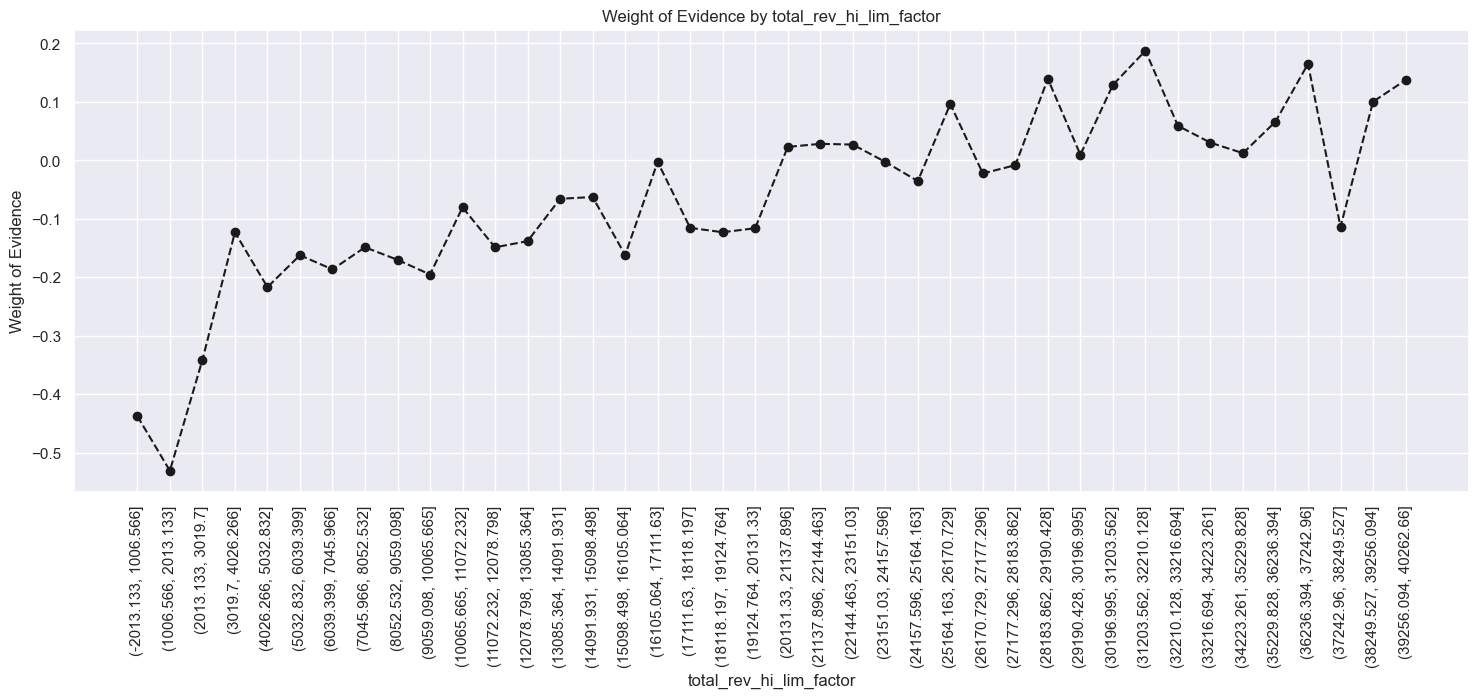

In [420]:
plot_by_woe(df_temp.iloc[ :40,:],90)

In [421]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [422]:
df_inputs_prepr['annual_inc'].unique()

array([ 65000.,  60000., 175000., ...,  81961.,  29310.,  47939.])

In [423]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_inputs_prepr['annual_inc_factor'].unique()

[(-2695.2, 154704.0], (154704.0, 304608.0], (304608.0, 454512.0], (454512.0, 604416.0], (754320.0, 904224.0], ..., (904224.0, 1054128.0], (1353936.0, 1503840.0], (1054128.0, 1204032.0], (1204032.0, 1353936.0], (7350096.0, 7500000.0]]
Length: 11
Categories (50, interval[float64, right]): [(-2695.2, 154704.0] < (154704.0, 304608.0] < (304608.0, 454512.0] < (454512.0, 604416.0] ... (6900384.0, 7050288.0] < (7050288.0, 7200192.0] < (7200192.0, 7350096.0] < (7350096.0, 7500000.0]]

In [424]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"annual_inc_factor",df_outputs_prepr)

In [425]:
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.889040    0.956529  79305.0  9898.0   
1     (154704.0, 304608.0]   3626   0.926641    0.038882   3360.0   266.0   
2     (304608.0, 454512.0]    282   0.929078    0.003024    262.0    20.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   0.956522    0.000247     22.0     1.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   0.500000    0.000021      1.0     1.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WOE   IV  
0      0.954711    0.971344 -0.01727

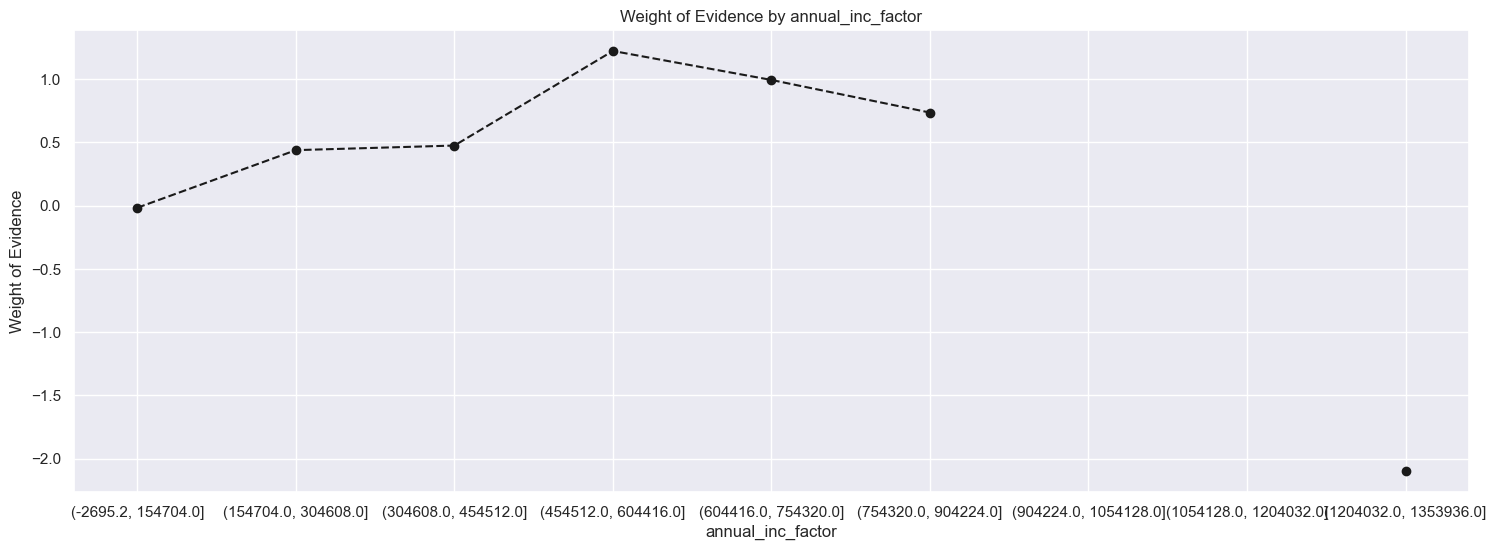

In [426]:
plot_by_woe(df_temp)

In [427]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr["annual_inc"]<=140000, : ]

In [428]:
df_inputs_prepr_temp["annual_inc"].unique()

array([65000., 60000., 66000., ..., 81961., 29310., 47939.])

In [429]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp["annual_inc"],50)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\4265745751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp["annual_inc"],50)


In [430]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp,"annual_inc_factor",df_outputs_prepr[df_inputs_prepr_temp.index])

In [431]:
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1      (7504.0, 10208.0]     84   0.761905    0.000958    64.0   20.0   
2     (10208.0, 12912.0]    123   0.780488    0.001403    96.0   27.0   
3     (12912.0, 15616.0]    304   0.851974    0.003467   259.0   45.0   
4     (15616.0, 18320.0]    383   0.827676    0.004368   317.0   66.0   
5     (18320.0, 21024.0]    733   0.840382    0.008359   616.0  117.0   
6     (21024.0, 23728.0]    704   0.846591    0.008028   596.0  108.0   
7     (23728.0, 26432.0]   1785   0.861064    0.020356  1537.0  248.0   
8     (26432.0, 29136.0]   1355   0.853137    0.015452  1156.0  199.0   
9     (29136.0, 31840.0]   2292   0.854276    0.026137  1958.0  334.0   
10    (31840.0, 34544.0]   2130   0.855399    0.024290  1822.0  308.0   
11    (34544.0, 37248.0]   3525   0.853050    0.040198  3007.0  518.0   
12    (37248.0, 39952.0]   1926   0.880582    0.021963  1696.0  230.0   
13    (39952.0, 42656.0]   4973   0.867484    0.056710  4314.0  659.0   
14    (42656.0, 45360.0]   4038   0.875929    0.046048  3537.0  501.0   
15    (45360.0, 48064.0]   3015   0.880597    0.034382  2655.0  360.0   
16    (48064.0, 50768.0]   4397   0.878326    0.050142  3862.0  535.0   
17    (50768.0, 53472.0]   2898   0.885783    0.033048  2567.0  331.0   
18    (53472.0, 56176.0]   4143   0.873280    0.047245  3618.0  525.0   
19    (56176.0, 58880.0]   1810   0.883425    0.020641  1599.0  211.0   
20    (58880.0, 61584.0]   4726   0.881083    0.053894  4164.0  562.0   
21    (61584.0, 64288.0]   2246   0.895815    0.025613  2012.0  234.0   
22    (64288.0, 66992.0]   3455   0.895803    0.039400  3095.0  360.0   
23    (66992.0, 69696.0]   1965   0.907379    0.022408  1783.0  182.0   
24    (69696.0, 72400.0]   4096   0.899902    0.046709  3686.0  410.0   
25    (72400.0, 75104.0]   3495   0.897854    0.039856  3138.0  357.0   
26    (75104.0, 77808.0]    967   0.915202    0.011027   885.0   82.0   
27    (77808.0, 80512.0]   3571   0.901988    0.040723  3221.0  350.0   
28    (80512.0, 83216.0]   1319   0.924185    0.015041  1219.0  100.0   
29    (83216.0, 85920.0]   2274   0.899736    0.025932  2046.0  228.0   
30    (85920.0, 88624.0]   1144   0.905594    0.013046  1036.0  108.0   
31    (88624.0, 91328.0]   2425   0.924536    0.027654  2242.0  183.0   
32    (91328.0, 94032.0]   1141   0.911481    0.013012  1040.0  101.0   
33    (94032.0, 96736.0]   1562   0.913572    0.017813  1427.0  135.0   
34    (96736.0, 99440.0]    916   0.918122    0.010446   841.0   75.0   
35   (99440.0, 102144.0]   2307   0.902904    0.026308  2083.0  224.0   
36  (102144.0, 104848.0]    552   0.898551    0.006295   496.0   56.0   
37  (104848.0, 107552.0]   1094   0.932358    0.012476  1020.0   74.0   
38  (107552.0, 110256.0]   1562   0.915493    0.017813  1430.0  132.0   
39  (110256.0, 112960.0]    295   0.908475    0.003364   268.0   27.0   
40  (112960.0, 115664.0]    790   0.911392    0.009009   720.0   70.0   
41  (115664.0, 118368.0]    358   0.935754    0.004083   335.0   23.0   
42  (118368.0, 121072.0]   1473   0.918534    0.016798  1353.0  120.0   
43  (121072.0, 123776.0]    204   0.936275    0.002326   191.0   13.0   
44  (123776.0, 126480.0]    870   0.928736    0.009921   808.0   62.0   
45  (126480.0, 129184.0]    239   0.933054    0.002725   223.0   16.0   
46  (129184.0, 131888.0]    734   0.927793    0.008370   681.0   53.0   
47  (131888.0, 134592.0]    207   0.932367    0.002361   193.0   14.0   
48  (134592.0, 137296.0]    449   0.915367    0.005120   411.0   38.0   
49  (137296.0, 140000.0]    627   0.909091    0.007150   570.0   57.0   

    prop_n_good  prop_n_bad       WOE   IV  
0      0.000128    0.000000       inf  inf  
1      0.000822    0.002043 -0.911157  inf  
2      0.001232    0.002758 -0.805796  inf  
3      0.003325    0.004597 -0.324142  inf  
4      0.004069    0.006743 -0.505060  inf  
5      0.0079

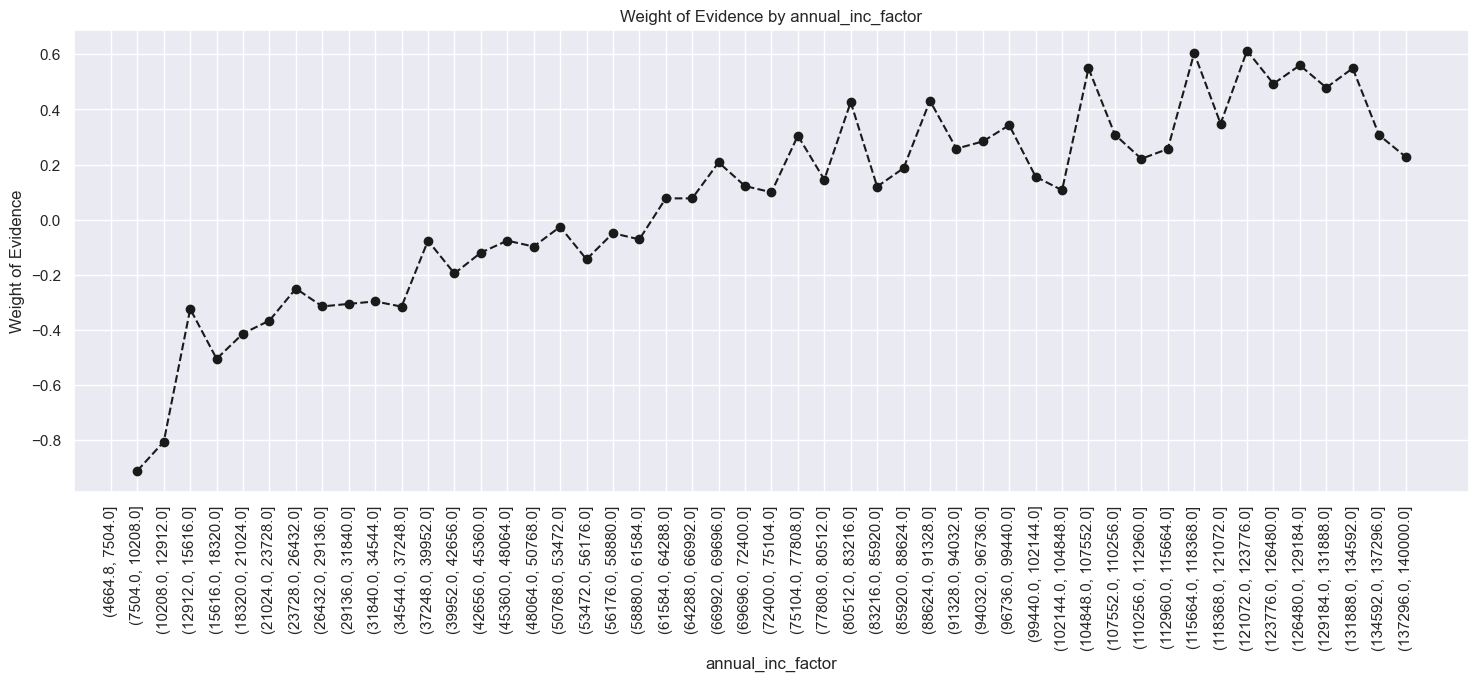

In [432]:
plot_by_woe(df_temp,90)

In [433]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\3226331627.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\3226331627.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
C:\Users\lin48\AppData\Loca

In [434]:
df_inputs_prepr['mths_since_last_delinq'].unique()

array([ nan,   3.,  41.,  39.,  12.,  73.,  26.,  40.,  68.,  63.,   0.,
        46.,  58.,  72.,  75.,  20.,  52.,  38.,  33.,  44.,  22.,   2.,
        16.,  47.,  42.,  76.,  37.,  30.,  13.,  35.,  71.,  43.,  61.,
        15.,   7.,  25.,   9.,  21.,  28.,  59.,  14.,  31.,  34.,  18.,
        51.,  77.,  79.,  45.,  32.,   8.,  24.,   1.,  54.,  60.,  49.,
        11.,  53.,  29.,  69.,  62.,  78.,  19.,  23.,  36.,  81.,   5.,
        27.,  17.,  55.,   6.,  64.,  56.,  70.,  48.,   4.,  57.,  50.,
        10.,  80.,  67.,  83.,  65.,  74.,  82.,  66.,  88.,  84., 143.,
       107.,  85., 122.,  90.,  95.,  86., 170.,  87., 131., 101., 103.,
        99.,  97., 118., 110., 119., 135.,  96., 121., 106., 124., 105.,
       113.])

In [435]:
woe_ordered_continuous(df_inputs_prepr,"mths_since_last_delinq",df_outputs_prepr)

mths_since_last_delinq  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                       0.0    238   0.764706    0.005523   182.0   56.0   
1                       1.0    301   0.897010    0.006985   270.0   31.0   
2                       2.0    392   0.885204    0.009097   347.0   45.0   
3                       3.0    417   0.892086    0.009677   372.0   45.0   
4                       4.0    485   0.868041    0.011255   421.0   64.0   
5                       5.0    613   0.882545    0.014226   541.0   72.0   
6                       6.0    792   0.886364    0.018380   702.0   90.0   
7                       7.0    777   0.890605    0.018032   692.0   85.0   
8                       8.0    858   0.879953    0.019911   755.0  103.0   
9                       9.0    875   0.892571    0.020306   781.0   94.0   
10                     10.0    863   0.885284    0.020027   764.0   99.0   
11                     11.0    788   0.904822    0.018287   713.0   75.0   
12                     12.0    866   0.891455    0.020097   772.0   94.0   
13                     13.0    842   0.891924    0.019540   751.0   91.0   
14                     14.0    812   0.866995    0.018844   704.0  108.0   
15                     15.0    811   0.889026    0.018821   721.0   90.0   
16                     16.0    778   0.897172    0.018055   698.0   80.0   
17                     17.0    764   0.883508    0.017730   675.0   89.0   
18                     18.0    766   0.902089    0.017776   691.0   75.0   
19                     19.0    746   0.871314    0.017312   650.0   96.0   
20                     20.0    770   0.905195    0.017869   697.0   73.0   
21                     21.0    707   0.895332    0.016407   633.0   74.0   
22                     22.0    715   0.904895    0.016593   647.0   68.0   
23                     23.0    693   0.894661    0.016082   620.0   73.0   
24                     24.0    622   0.887460    0.014435   552.0   70.0   
25                     25.0    702   0.886040    0.016291   622.0   80.0   
26                     26.0    699   0.911302    0.016221   637.0   62.0   
27                     27.0    732   0.896175    0.016987   656.0   76.0   
28                     28.0    658   0.896657    0.015270   590.0   68.0   
29                     29.0    641   0.887676    0.014875   569.0   72.0   
30                     30.0    630   0.904762    0.014620   570.0   60.0   
31                     31.0    645   0.875969    0.014968   565.0   80.0   
32                     32.0    619   0.888530    0.014365   550.0   69.0   
33                     33.0    602   0.901993    0.013970   543.0   59.0   
34                     34.0    587   0.902896    0.013622   530.0   57.0   
35                     35.0    597   0.902848    0.013854   539.0   58.0   
36                     36.0    573   0.909250    0.013297   521.0   52.0   
37                     37.0    616   0.900974    0.014295   555.0   61.0   
38                     38.0    598   0.891304    0.013878   533.0   65.0   
39                     39.0    592   0.864865    0.013738   512.0   80.0   
40                     40.0    575   0.907826    0.013344   522.0   53.0   
41                     41.0    563   0.875666    0.013065   493.0   70.0   
42                     42.0    612   0.869281    0.014203   532.0   80.0   
43                     43.0    526   0.870722    0.012207   458.0   68.0   
44                     44.0    569   0.889279    0.013205   506.0   63.0   
45                     45.0    585   0.905983    0.013576   530.0   55.0   
46                     46.0    538   0.895911    0.012485   482.0   56.0   
47                     47.0    541   0.894640    0.012555   484.0   57.0   
48                     48.0    531   0.887006    0.012323   471.0   60.0   
49                     49.0    442   0.875566    0.010257   387.0   55.0   
50                     50.0    393   0.898219    0.009120   353.0   40.0   
51                     51.0    373   0.895442    0.00

In [436]:
df_inputs_prepr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93257 entries, 362514 to 167512
Columns: 303 entries, Unnamed: 0 to annual_inc:>140K
dtypes: bool(126), category(8), datetime64[ns](2), float64(48), int32(84), int64(11), object(23), timedelta64[ns](1)
memory usage: 103.2+ MB


In [437]:
df_inputs_prepr["mths_since_last_delinq"].info()

<class 'pandas.core.series.Series'>
Index: 93257 entries, 362514 to 167512
Series name: mths_since_last_delinq
Non-Null Count  Dtype  
--------------  -----  
43091 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [438]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

In [439]:
df_inputs_prepr_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43091 entries, 288564 to 296284
Columns: 303 entries, Unnamed: 0 to annual_inc:>140K
dtypes: bool(126), category(8), datetime64[ns](2), float64(48), int32(84), int64(11), object(23), timedelta64[ns](1)
memory usage: 47.7+ MB


In [440]:
df_inputs_prepr_temp1 = df_inputs_prepr[pd.isnull(df_inputs_prepr["mths_since_last_delinq"])]

In [441]:
df_inputs_prepr_temp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50166 entries, 362514 to 167512
Columns: 303 entries, Unnamed: 0 to annual_inc:>140K
dtypes: bool(126), category(8), datetime64[ns](2), float64(48), int32(84), int64(11), object(23), timedelta64[ns](1)
memory usage: 55.6+ MB


In [442]:
df1 = pd.concat([df_inputs_prepr_temp1["mths_since_last_delinq"],df_outputs_prepr[df_inputs_prepr_temp1.index]],axis=1)

In [443]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50166 entries, 362514 to 167512
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mths_since_last_delinq  0 non-null      float64
 1   good_bad                50166 non-null  int32  
dtypes: float64(1), int32(1)
memory usage: 979.8 KB


In [444]:
df_inputs_prepr_temp["mths_since_last_delinq_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_delinq"],50)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\2298012212.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp["mths_since_last_delinq_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_delinq"],50)
C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\2298012212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["mths_since_last_delinq_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_delinq"],50)


In [445]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp,"mths_since_last_delinq_factor",df_outputs_prepr[df_inputs_prepr_temp.index])

In [446]:
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.868694    0.031283  1171.0  177.0   
1                     (3.4, 6.8]   1890   0.880423    0.043861  1664.0  226.0   
2                    (6.8, 10.2]   3373   0.887044    0.078276  2992.0  381.0   
3                   (10.2, 13.6]   2496   0.895833    0.057924  2236.0  260.0   
4                   (13.6, 17.0]   3165   0.884044    0.073449  2798.0  367.0   
5                   (17.0, 20.4]   2282   0.893076    0.052958  2038.0  244.0   
6                   (20.4, 23.8]   2115   0.898345    0.049082  1900.0  215.0   
7                   (23.8, 27.2]   2755   0.895463    0.063934  2467.0  288.0   
8                   (27.2, 30.6]   1929   0.896319    0.044766  1729.0  200.0   
9                   (30.6, 34.0]   2453   0.891969    0.056926  2188.0  265.0   
10                  (34.0, 37.4]   1786   0.904255    0.041447  1615.0  171.0   
11                  (37.4, 40.8]   1765   0.887819    0.040960  1567.0  198.0   
12                  (40.8, 44.2]   2270   0.876211    0.052679  1989.0  281.0   
13                  (44.2, 47.6]   1664   0.899038    0.038616  1496.0  168.0   
14                  (47.6, 51.0]   1739   0.888442    0.040356  1545.0  194.0   
15                  (51.0, 54.4]   1158   0.887737    0.026873  1028.0  130.0   
16                  (54.4, 57.8]   1130   0.911504    0.026224  1030.0  100.0   
17                  (57.8, 61.2]   1423   0.895994    0.033023  1275.0  148.0   
18                  (61.2, 64.6]   1015   0.887685    0.023555   901.0  114.0   
19                  (64.6, 68.0]   1342   0.891952    0.031143  1197.0  145.0   
20                  (68.0, 71.4]    930   0.884946    0.021582   823.0  107.0   
21                  (71.4, 74.8]    928   0.889009    0.021536   825.0  103.0   
22                  (74.8, 78.2]   1195   0.907950    0.027732  1085.0  110.0   
23                  (78.2, 81.6]    768   0.880208    0.017823   676.0   92.0   
24                  (81.6, 85.0]    136   0.897059    0.003156   122.0   14.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

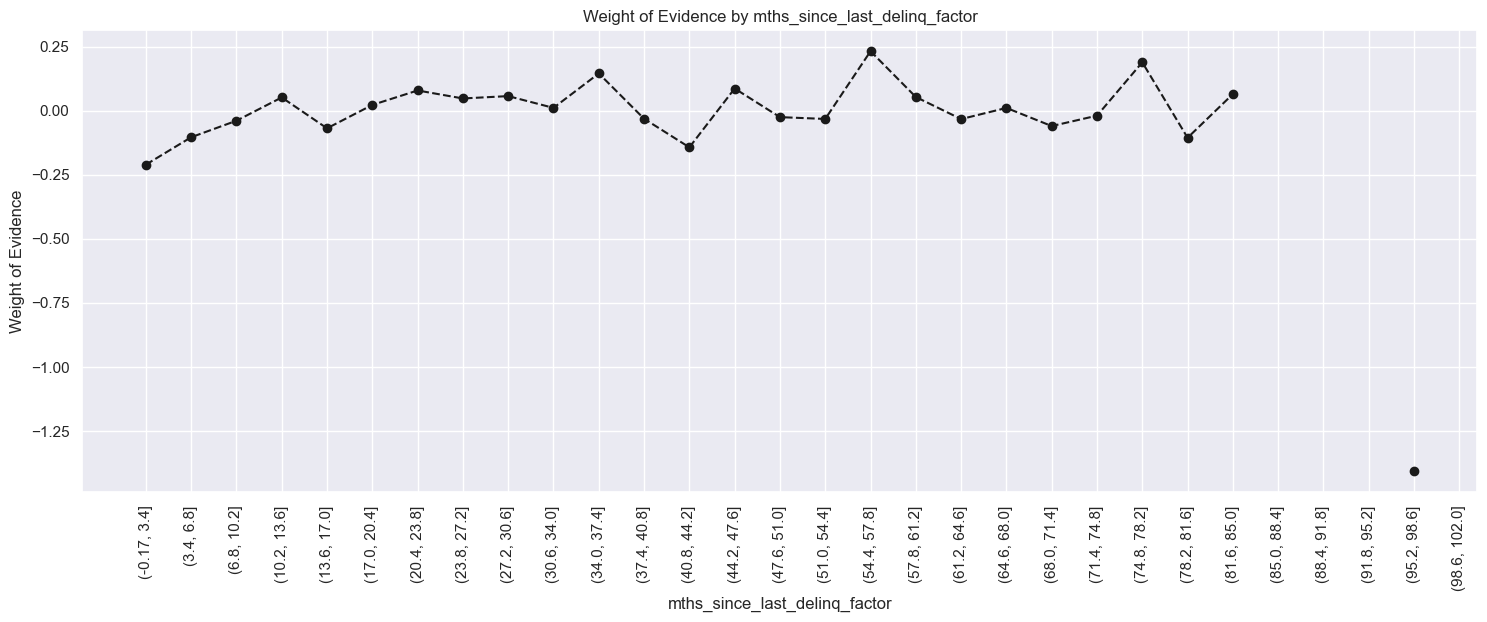

In [447]:
plot_by_woe(df_temp,90)

In [448]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\3878719826.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\3878719826.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
C:\Users\lin48\AppData\

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

In [449]:
df_inputs_prepr.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           5512
emp_length                                                          4200
home_ownership                                     

In [450]:
df_inputs_prepr["dti"].isnull().sum()

0

In [451]:
df_inputs_prepr["dti_factor"] = pd.cut(df_inputs_prepr["dti"],50)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\1897066171.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr["dti_factor"] = pd.cut(df_inputs_prepr["dti"],50)


In [452]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"dti_factor",df_outputs_prepr)

In [453]:
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.8]    371   0.886792    0.003978   329.0   42.0   
1         (0.8, 1.6]    478   0.899582    0.005126   430.0   48.0   
2       (1.6, 2.399]    639   0.902973    0.006852   577.0   62.0   
3     (2.399, 3.199]    808   0.912129    0.008664   737.0   71.0   
4     (3.199, 3.999]   1047   0.916905    0.011227   960.0   87.0   
5     (3.999, 4.799]   1260   0.912698    0.013511  1150.0  110.0   
6     (4.799, 5.599]   1527   0.912901    0.016374  1394.0  133.0   
7     (5.599, 6.398]   1730   0.905202    0.018551  1566.0  164.0   
8     (6.398, 7.198]   1999   0.919960    0.021435  1839.0  160.0   
9     (7.198, 7.998]   2227   0.908846    0.023880  2024.0  203.0   
10    (7.998, 8.798]   2299   0.909526    0.024652  2091.0  208.0   
11    (8.798, 9.598]   2590   0.907336    0.027773  2350.0  240.0   
12   (9.598, 10.397]   2800   0.912143    0.030025  2554.0  246.0   
13  (10.397, 11.197]   3076   0.907672    0.032984  2792.0  284.0   
14  (11.197, 11.997]   3151   0.903205    0.033788  2846.0  305.0   
15  (11.997, 12.797]   3326   0.901383    0.035665  2998.0  328.0   
16  (12.797, 13.597]   3331   0.909937    0.035718  3031.0  300.0   
17  (13.597, 14.396]   3431   0.897115    0.036791  3078.0  353.0   
18  (14.396, 15.196]   3528   0.896259    0.037831  3162.0  366.0   
19  (15.196, 15.996]   3447   0.899333    0.036962  3100.0  347.0   
20  (15.996, 16.796]   3342   0.897367    0.035836  2999.0  343.0   
21  (16.796, 17.596]   3478   0.890454    0.037295  3097.0  381.0   
22  (17.596, 18.395]   3351   0.899731    0.035933  3015.0  336.0   
23  (18.395, 19.195]   3266   0.891304    0.035021  2911.0  355.0   
24  (19.195, 19.995]   3209   0.885011    0.034410  2840.0  369.0   
25  (19.995, 20.795]   3168   0.883838    0.033971  2800.0  368.0   
26  (20.795, 21.595]   2960   0.881757    0.031740  2610.0  350.0   
27  (21.595, 22.394]   2846   0.875615    0.030518  2492.0  354.0   
28  (22.394, 23.194]   2637   0.866894    0.028277  2286.0  351.0   
29  (23.194, 23.994]   2565   0.871345    0.027505  2235.0  330.0   
30  (23.994, 24.794]   2329   0.873336    0.024974  2034.0  295.0   
31  (24.794, 25.594]   2106   0.865147    0.022583  1822.0  284.0   
32  (25.594, 26.393]   1957   0.862034    0.020985  1687.0  270.0   
33  (26.393, 27.193]   1785   0.866667    0.019141  1547.0  238.0   
34  (27.193, 27.993]   1753   0.871078    0.018798  1527.0  226.0   
35  (27.993, 28.793]   1575   0.862222    0.016889  1358.0  217.0   
36  (28.793, 29.593]   1492   0.866622    0.015999  1293.0  199.0   
37  (29.593, 30.392]   1203   0.857855    0.012900  1032.0  171.0   
38  (30.392, 31.192]    931   0.862513    0.009983   803.0  128.0   
39  (31.192, 31.992]    874   0.862700    0.009372   754.0  120.0   
40  (31.992, 32.792]    797   0.855709    0.008546   682.0  115.0   
41  (32.792, 33.592]    718   0.862117    0.007699   619.0   99.0   
42  (33.592, 34.391]    704   0.859375    0.007549   605.0   99.0   
43  (34.391, 35.191]    471   0.872611    0.005051   411.0   60.0   
44  (35.191, 35.991]    148   0.912162    0.001587   135.0   13.0   
45  (35.991, 36.791]    135   0.866667    0.001448   117.0   18.0   
46  (36.791, 37.591]    110   0.936364    0.001180   103.0    7.0   
47   (37.591, 38.39]     99   0.868687    0.001062    86.0   13.0   
48    (38.39, 39.19]     82   0.841463    0.000879    69.0   13.0   
49    (39.19, 39.99]    101   0.891089    0.001083    90.0   11.0   

    prop_n_good  prop_n_bad       WOE        IV  
0      0.003961    0.004122 -0.039853  0.032501  
1      0.005177    0.004711  0.094344  0.032501  
2      0.006946    0.006084  0.132467  0.032501  
3      0.008872    0.006968  0.241667  0.032501  
4      0.011557    0.008538  0.302785  0.032501  
5      0.013844    0.010795  0.248796  0.032501  
6      0.016782    0.013052  0.251343  0.032501  
7      0.018852    0.016094  0.158173  0.032501  
8      0.022139    0.015702  0.343563  0

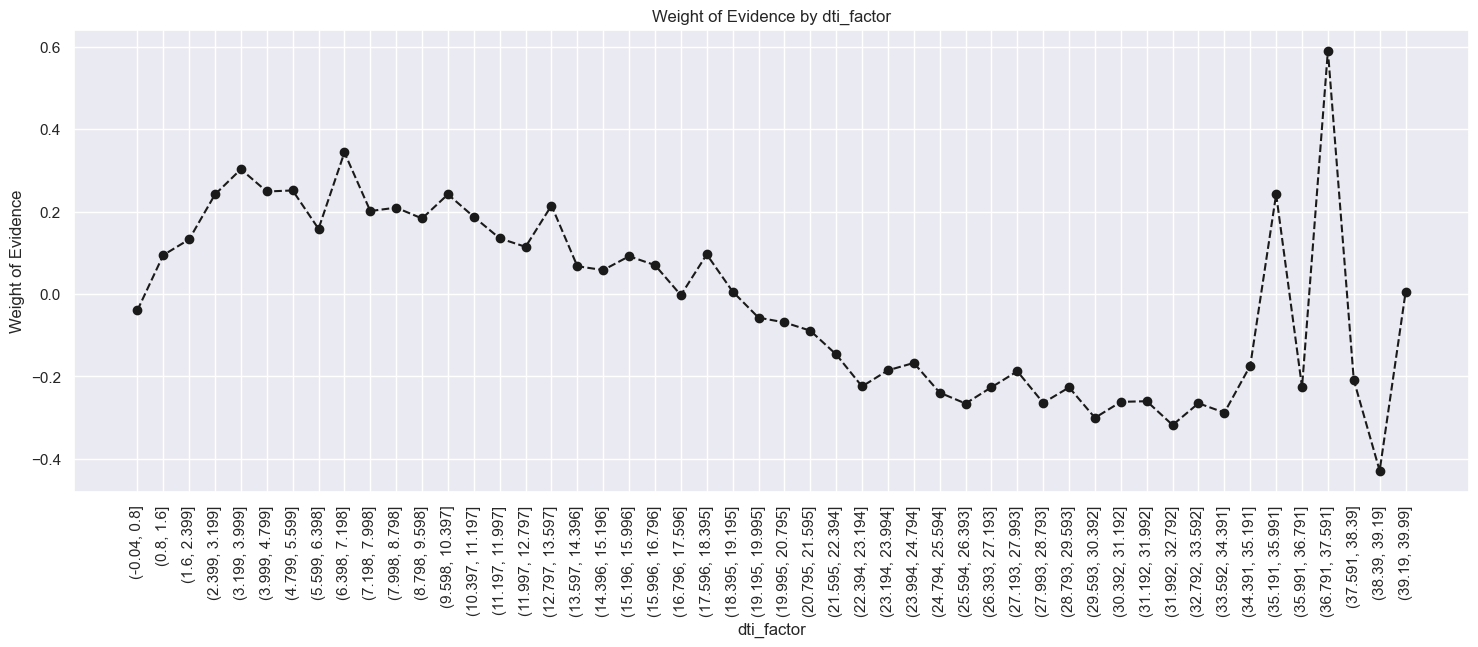

In [454]:
plot_by_woe(df_temp, 90)

In [455]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\3828360169.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\3828360169.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\3828360169.py:3: PerformanceWarning: DataFrame is highly fragment

In [456]:
df_inputs_prepr["mths_since_last_record"].isnull().sum()

80686

In [457]:
df_inputs_prepr["mths_since_last_record"].notnull().sum()

12571

In [458]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr["mths_since_last_record"])]

In [459]:
df_inputs_prepr_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12571 entries, 97373 to 251591
Columns: 319 entries, Unnamed: 0 to dti:>35
dtypes: bool(126), category(9), datetime64[ns](2), float64(48), int32(99), int64(11), object(23), timedelta64[ns](1)
memory usage: 14.7+ MB


In [460]:
df_inputs_prepr_temp["mths_since_last_record_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_record"],50)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\2421063528.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp["mths_since_last_record_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_record"],50)
C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\2421063528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["mths_since_last_record_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_record"],50)


In [461]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp,"mths_since_last_record_factor",df_outputs_prepr[df_inputs_prepr_temp.index])

C:\Users\lin48\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [462]:
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.741803    0.019410   181.0   63.0   
1                   (2.58, 5.16]     36   0.888889    0.002864    32.0    4.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.939394    0.005250    62.0    4.0   
4                  (10.32, 12.9]     42   0.833333    0.003341    35.0    7.0   
5                  (12.9, 15.48]     69   0.869565    0.005489    60.0    9.0   
6                 (15.48, 18.06]     95   0.863158    0.007557    82.0   13.0   
7                 (18.06, 20.64]     58   0.965517    0.004614    56.0    2.0   
8                 (20.64, 23.22]    101   0.891089    0.008034    90.0   11.0   
9                  (23.22, 25.8]     94   0.946809    0.007478    89.0    5.0   
10                 (25.8, 28.38]    135   0.896296    0.010739   121.0   14.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.923469    0.015591   181.0   15.0   
13                (33.54, 36.12]    195   0.907692    0.015512   177.0   18.0   
14                 (36.12, 38.7]    166   0.909639    0.013205   151.0   15.0   
15                 (38.7, 41.28]    234   0.905983    0.018614   212.0   22.0   
16                (41.28, 43.86]    194   0.896907    0.015432   174.0   20.0   
17                (43.86, 46.44]    328   0.917683    0.026092   301.0   27.0   
18                (46.44, 49.02]    367   0.920981    0.029194   338.0   29.0   
19                 (49.02, 51.6]    231   0.943723    0.018376   218.0   13.0   
20                 (51.6, 54.18]    447   0.926174    0.035558   414.0   33.0   
21                (54.18, 56.76]    264   0.897727    0.021001   237.0   27.0   
22                (56.76, 59.34]    393   0.928753    0.031262   365.0   28.0   
23                (59.34, 61.92]    287   0.909408    0.022830   261.0   26.0   
24                 (61.92, 64.5]    405   0.920988    0.032217   373.0   32.0   
25                 (64.5, 67.08]    394   0.961929    0.031342   379.0   15.0   
26                (67.08, 69.66]    272   0.893382    0.021637   243.0   29.0   
27                (69.66, 72.24]    366   0.912568    0.029115   334.0   32.0   
28                (72.24, 74.82]    231   0.922078    0.018376   213.0   18.0   
29                 (74.82, 77.4]    350   0.920000    0.027842   322.0   28.0   
30                 (77.4, 79.98]    228   0.903509    0.018137   206.0   22.0   
31                (79.98, 82.56]    355   0.895775    0.028240   318.0   37.0   
32                (82.56, 85.14]    288   0.916667    0.022910   264.0   24.0   
33                (85.14, 87.72]    251   0.816733    0.019967   205.0   46.0   
34                 (87.72, 90.3]    345   0.889855    0.027444   307.0   38.0   
35                 (90.3, 92.88]    249   0.843373    0.019807   210.0   39.0   
36                (92.88, 95.46]    385   0.862338    0.030626   332.0   53.0   
37                (95.46, 98.04]    401   0.877805    0.031899   352.0   49.0   
38               (98.04, 100.62]    327   0.871560    0.026012   285.0   42.0   
39               (100.62, 103.2]    526   0.884030    0.041842   465.0   61.0   
40               (103.2, 105.78]    396   0.891414    0.031501   353.0   43.0   
41              (105.78, 108.36]    565   0.886726    0.044945   501.0   64.0   
42              (108.36, 110.94]    407   0.911548    0.032376   371.0   36.0   
43              (110.94, 113.52]    524   0.883588    0.041683   463.0   61.0   
44               (113.52, 116.1]    515   0.908738    0.040967   468.0   47.0   
45               (116.1, 118.68]    314   0.882166    0.024978   277.0   37.0   
46              (118.68, 121.26]     92   0.847826    0.007318    78.0   14.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

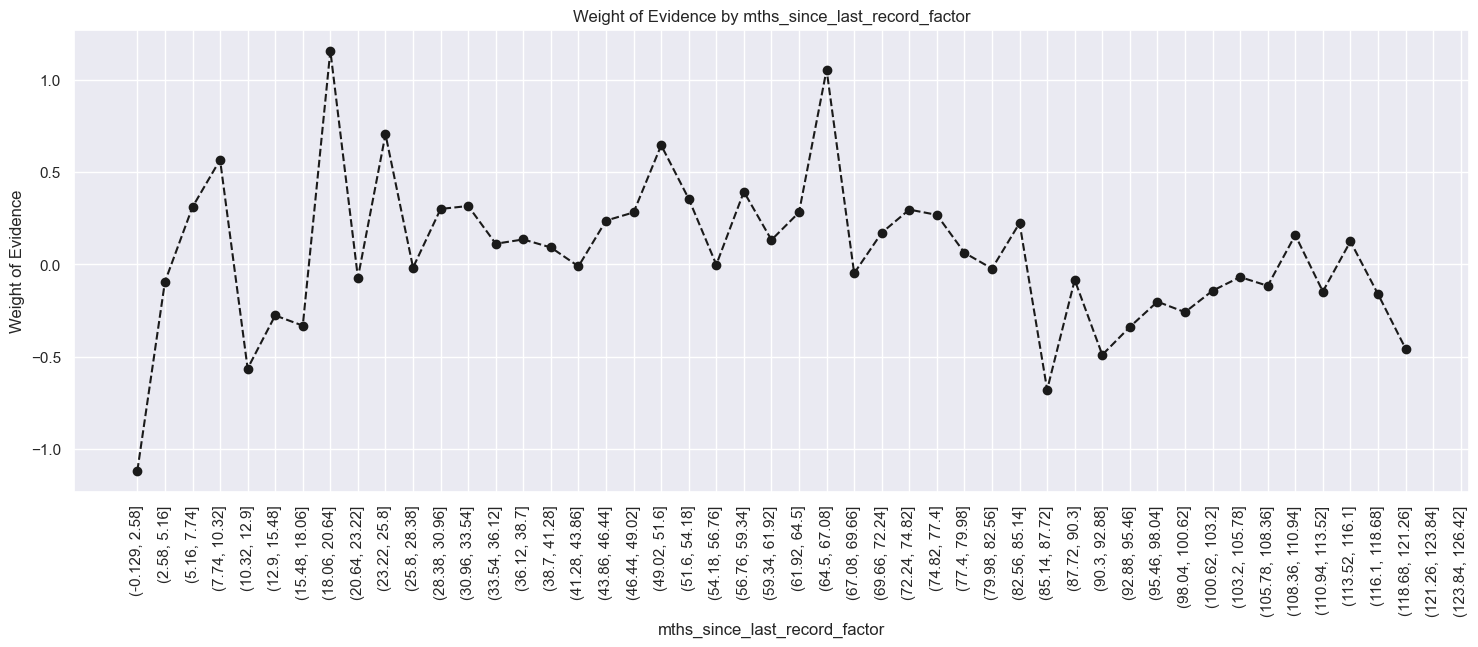

In [463]:
plot_by_woe(df_temp,90)

In [464]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\1059239224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
C:\Users\lin48\AppData\Local\Temp\ipykernel_15924\1059239224.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
C:\Users\lin48\AppData\

## Preprocessing the train dataset

In [465]:
#loan_data_inputs_train = df_inputs_prepr
#loan_data_outputs_train = df_outputs_prepr

## Preprocessing the test dataset

In [466]:
loan_data_inputs_test = df_inputs_prepr
loan_data_outputs_test = df_outputs_prepr

In [467]:
loan_data_inputs_train.shape

(373028, 326)

In [468]:
loan_data_outputs_train.shape

(373028,)

In [469]:
loan_data_inputs_test.shape

(93257, 326)

In [470]:
loan_data_outputs_test.shape

(93257,)

## Save train/test datasets to new files

In [471]:
#loan_data_inputs_train.to_csv("loan_data_inputs_train.csv")
#loan_data_outputs_train.to_csv("loan_data_outputs_train.csv")
#loan_data_inputs_test.to_csv("loan_data_inputs_test.csv")
#loan_data_outputs_test.to_csv("loan_data_outputs_test.csv")